# Importing the libraries.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import pickle

# Read train data.

In [8]:
heading =['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']
df = pd.read_csv("train_data.csv" , header=None, names = heading, na_values="?", skipinitialspace = True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


# Get some info about train data.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32562 entries, 0 to 32561
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32562 non-null  object
 1   workclass       30726 non-null  object
 2   fnlwgt          32562 non-null  object
 3   education       32562 non-null  object
 4   education-num   32562 non-null  object
 5   marital-status  32562 non-null  object
 6   occupation      30719 non-null  object
 7   relationship    32562 non-null  object
 8   race            32562 non-null  object
 9   sex             32562 non-null  object
 10  capital-gain    32562 non-null  object
 11  capital-loss    32562 non-null  object
 12  hours-per-week  32562 non-null  object
 13  native-country  31979 non-null  object
 14  income          32562 non-null  object
dtypes: object(15)
memory usage: 3.7+ MB


In [10]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

## Data Analysis and Cleaning.

income
<=50K      24720
>50K        7841
Income         1
Name: count, dtype: int64

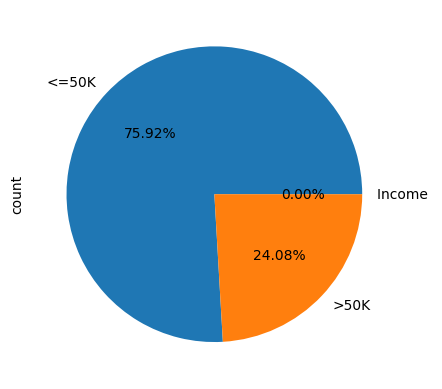

In [11]:
income_count = df['income'].value_counts()
income_count.plot.pie(autopct='%.2f%%')
income_count

In [12]:
def draw_distribution(column, title = ""):
    fig, ax = plt.subplots(figsize=(30,10))
    ax.hist(column, color='grey')
    ax.axvline(column.mean(), c='red', label="mean")
    ax.axvline(column.median(), c='blue', label="median")
    ax.legend(loc='upper right')
    ax.set_title(title)
    plt.show()

TypeError: Could not convert string 'age3950385328374952314237302332403425323843405435435956195439492320453022482119314831532449255753444129251847504743463541303032484229362853492519312923792740671831185246594453493330435737283034294837483276444720293217303142243856283653564955222140302919472031353928243837463843272049612719457031223664434734332152482371294268254428453639461866272851272827213418334443304037344153315838244147412336403524261951423718363558174437356054375038452531649054531860667565354125332859404138234041242038565832404541425919584220324550364517592637196433336117502730434435252422423460215741502550363129212765373924384821315524432646354126341936222477222962394335297663234358664126475553173049194526383633224367305631332633465938654042263662434322285622573926174045442033234638544625463623294419193527463434444520255220285034284128462832412433463135523034342017322933253623634780174030273334342342294524442720445120171945604244403038233244543250243752384930602235306746172227233343284152256359453840463534334120232672236252582524194347394953323428572520213438502437442842743844442636416739572931344429302727325835212846367235336935313430285447245220434529472451173727291836582665575927312129185257425560312327234225493219604235485129361752242426273930505246234565294730343833494749433058192133475226602136315031715830202435382729703444434435274320422742202448171733502217323158293734231834664541265424422023253531301936312131464440456018283636403631331922343341295042434420316523552625453536435642195542261742553229462922582339275433463736593453513231224732263731375523363443544328404140426118592148411823602261254643432468311732503364203022432217474156644748312930325762394324425326737255254124631735516255434037393161264626483434593449184348283324211739294424715155412338391949322738336323335429483528374240472230286351222735463724375327385334233943678121232542386432375122334219512337374741333131353818205440364344444351185141443333422532323628203555483634286737442521407834492223604563414744514641504735564548403920503823315866395426513450423848335122194148423423563045484831202732761966373434902343442428642320366153305238323041494543615434493835363036223837481719272249434319584131303229423841443134212262192943684539413434312941413533376934603641585329453436482035634128303431374231463527411920594056333046615025402451433446282620445133545033652288405150252047582250472450403632445159652427514839281949515918504530374433616138223644373154206348333138454853553829364250754652274331233441314235553665386254493432514830522829385743373053697322313850374447272825205146674742524265215046475737505863394636262141442229295836303729264349452820513224353541486120275539174752242925202357513339407138285747592635611736623432423958614031362333522251314949535220266143464341445465322523251937453740191727405919434254545150405550314224303937334843395352283231314719404041534645391957495932183558283641475061363856504544514425601749465625227641484630394070354924406125286922473826173343585326433130255737322645532728323536193749206460325842204225303766594446592517474730202620334852374740484950303443223526623959692717384127231756246244234125211845755142472933432019442419495238243272263129394840512822236526205538333337192430572257466735473950583645542660462632384844374431615152453639674027375727283454524248655571333035591936263441442647185549444362443950355246444351204743642427323726435020374337534425171953445149354454371824292235563224437347493831394241353831513840214455294931244626352764262145573045503843423220274540383760532547405119426541284649243271262950511749312359174338372939314235394066304347453133322850632838523841505932735257355122492246485243253119195151223719452152464256235870304523343824534521213432216323282925441826472346612538602336463240313132216344422330244244272722685522256862263468424526252329653126394445262636383952394142472825353238442127303045205743502825259038355026395624461837574329404477302166406864263232515049282921285545353126303340233548395349313660295428343019264750304449753751352866723927572428233123312730313457392324363235362347354432326334472723195049362361412753172353282422531824203037341920472022426032466637344535635136255125194759344042283751253137422935512249265652614752304335174226586630464557252137456139422023254724203544472841312747446142464654495652342518583129283021447566263357474121176147224745325938334151422760643754363441356346472429745022483032394925504465285549314745353449392742606433234534532257202331233032425159364535334360373536385451456351586420443945442263264220293825274631244323324440382319414823474217292118312729234146344218461852562122314125434526904530422053645642263140584158626540452223633937255632533223355119412223362745232144293618622534313733222822476720342636282247333425373661745755204354254223173963195633372736302235201825532119343220705754344842452751363350443955243532666829246134552041366061354226443139203232615423193135292925463520244837603929313826644669394846423950243039292321326955414418744027755552543676261838501932572027316052615719593431427047472927255128353654465265434134474921201827343824344727633425541935242659432041512736255522584339404654192453242956542134563419324867475240284157512636334650337739673523374160325645241831214523451825311941742723314041254224424552343254423240556652213352282742274719465550322823433419372718314926483941484070203837495143381823346233316426556137782749554222616446242747184850405634561821402752462350192039247242425139403419264528303219215462254932263758374138474230433457463220475553438024432240485634512419342441242232412031554926273540596131436154302027446455346128344726353647173533251847444130535340242750364141313222221839383523543663395758291740692838444533413750482636213720542827334628174047442535293030562528434746413829255631223128534571653919343640905621484546642922476743423153813317552824403024263830334063235642404935522835214332292350341947372575242817313118453127482234265360494048236842372738277549273636353653273461294037224355282364462944206249293539393738723155383325193749263544374264283540552149515751382445284222286031474030617142444650274021256154315339574830354234596929402140433641722041344827352827201832382328403574282320444620514048604846482224451839652220284642612818244524442035522519355421264219554425266441254345486045513722442747324041322647553824645641333321595843214553412753383141224341274136492058353021294054353540594339517133283020513962372823395031452347593282497422323459365947532544574258393245475256523436413044173441292542482664463849234630494744311945342638313631303730217338303352583435594527314540271929343249337462394322247625193153614737502758433936562623476847452620463737435939326345593626344126533346793124574041204527363036253031492625292441355721293620513936406138202140462135393830283246404744385146514520443318615047345339586626414731522943423541345261391946392230404337233954462050173637535038635340232046285941335650314138251849392221352138553117312539503850633123184334184635465931274142553444263669333035252118352026463140403132232537185552263739621947515530594552213129241747463234632118498136473639464339292357382539245639231767412451304756515734245738233558191968431753372163312943272528547431231939615927192325405332726142177341232365455224233026371731526327317135443622323060257641264532223963236131253339532621183444314442433321305557373262315137454731754339302744534018332038484651352430702634467037362328445853232621344322413641274227413221442919214638435438185030302826373264183036182749463730292225383235562941472346283942396837572224195537372827405152744920408063635123663349203326523347235319265365683028543022251919322351254638264625202951402424315434192121233740574824433240524945622949552037432944283845221920603022513148435141625046546823492430383422306136514354635163512735314653264339505462571929205318222369565328283348614948325127194725722922575045525336462075322853174639383663282849433839424045292430444030425242394362308339414925485944364021412467245048552950644920303752227719524235275437372863192823443135644059224035203528283772253719314131442057264429364021213424283535384439571929235051284429312734502731463940281851586636382525904134333335395919391927525928375036342319332731213159401947345751213046405223902543382233346550292554494424256556392320244140553823444520294330283152363866632133462047336620284625373149225229183123275450462417495441493623636723226625303567302634211821765126181834595533254864472636215430415334202426253541331827325138412638543031267529612422344224422739205168284335444144204627324626203649323249362252422272304423225946306431644559324366234932493328474134252021254637414430543558213535194856654026452632352237256446306351683628414722333446283618335156542940532233286353375022402221252043293242332722292920353133674645173548492027645352293248303419392817542425254824314745195252196043242051382140543552535635432929275864532140523840395668244043384518574925525626192525214833312637292028497349514024184146466450532122373930252643592755202528296037252750414635213540492943393552252046242921374319476121356027575627471928436322253520483031205741332734225040374053382551221841333367472432292533553132183658341921363743524843225737395427216530222625354723423955244653444048262235204337304138774220363227254018491729472458294530195947412846406630445821593545303326483136483033193753183834453335223545175038334625646232176140213935292720345145203129565526463228272359263618336040482719382645203222223834463979602431372331292269554323292222252925333331305536472842516265236047507032373176543231316530632140261834664430363122282349396719302524463741404432584834294636592950252748513642493340266959303130272056244751344747203431425256532681285734312420686037253645343147607543182520325743184148354123323358223342253935504925474642372529262645343343285121233046382036374433454754174345374455412338233518472541234126304235282921484434193231254746183128383317414638244960446340454936654125206017283147455123443419514630375629465545344541223427291947435233292323394331472658475526283640196342762338334856324427332218444234455759335217296320425055272855445323254455484626303252523957212226264442402262441833451832332068614845363235395330374025415233282553443538343324652939463747625490335725445221313959294934223239465034281820205522604047235752422549414038582657284228173928425127412854734947274232322729224149584126213237234225674149361825433821656633512717326138434063764243764117303022532825244734266325283624514418546151435150272420525749422238213952255035505848301829526336243023352128201821274221512723572259382090355045442334233919544044312533323647802135773035493353415721192842293826414036282542323237394928241931402959522745585323354949254728207419283161302035232519302634493538363354191860284349251741309025272955314363465942262620196123243542313163294322172335325025263229579035316021712250372374675928456339333234392922534651445627523945373335463533483218203519215628453244553433362528395347492231441937602344542321195141611922224935382956416227552533264353435625602821402920251832274820553321433539192544273969342037436234314226392554443421503340443321354357512951351858571937384527643830461860304739422744335458455929274444332733553231573078283029666031262429443459232355393957353947532335442826233249363641215443353146465645215147421925373540573848344630453235625650254135333837561931533372543051303032303540381932497660605541245369714132455931404463315151234956393930433144433741434738461919243937284027222132204546462647223449202830232031464260302720564161476033404856505720462137422054326250494824464252583734261833412123263324435227613535454351354722492019274227232047177639253144533445343536453753353865492454171960467826583741301948225025182147333967191836232540733531202027666664482451253350513441305941363728192862365842432932643926192132302620193323294230633460482527553222251824297339335722333342435742222142394120474429527152365337263435203456392424232725294251315929182438363442452164324553423249622829323738441922245856374332344428353826202440237944513052413350514135342831226765392329574751345229292521385561344127784026435525264325225261422144655633224345423756354031262642454722333748574758555229422323463043253256331920343455553130315159584054251841573746391941543941265733566022584845185648403858236351224446643231362130315459285744535819393127463727332055394130392825315124702361454756792030274060587150293360334333333221383839172142423632372837504940404935332441433684234155304655345427523625522436316690672247325532482133274718442318562443232642235351402724424123423863311821245520312335511938527053593918411924253234355018373040225070437730335158223327353241371750315423402938302043253948412420255739663436464246344342317032464221242350371944293036492945754237516133505925225644355747275030464861334058463551376441184441333734242038282022552026204033542425184917343749743720403430444058444239194129343827544019173380242855215119426020512137264240553362472659702647255246673453223954243738413643392649374354535728292151465050363120363837391833352337255135546632372945614024495134282030492663366322403149352325342844332155177561532648283029253743403455312132262644492126401958612826644241453941513433233541394133222525773366194445281943393344624041234838374529661923343933432733265646389072202949232057463324495446314318194643584337215234283429394935311847464351211831395836383119382638364025413363513433253019472621366028194236352254365557562435513436514642252237486140585218274863383140412831323039283121334422423639613121393421752181543454416163242044473141536344372871572233302028542034212951391922591822423931282267174723202247496435522973385935182433405544402255454756443217443235273268203324484548286039232336255235414537586748632443363236432717454141184851265422194732463035527317324319264149523557353356421749393437222721594453264839345436605048354030653146676238242427434841303845455546243135372956602533442121464463443126376033382646244727464747693251365029322760314640396954564725342463296444263655373763331957312058202540182629453532612656224940372328273449412838472844415073213864475224442761585149231921563537413035475955223130244923503820494546193138562458282246305632565028302442311846313844551945505341452137423746453230573718324346363348343433362339221947464747523858325420252536692820213721253934334729484229342041452223192420325236182726522442392020396835542424206428364438225624242221424119672032465244653727353064483528634033402545305363273133394219315347272229523223275318412730412158454021295026232736223754364438491826483235404042301936315038354529413349284927474230373751275345374054473533283925333453213163215950661931234535322038496460252126236724463820282658313753453333356021384040442734204937524620434625483637184260374432294217413456282819493625424726353739424123313620365037253932592950423248205018606042493530592455193948442123225519234623472342221837343062513428564646233327211836373936242637343333202647175331342339222140543229682754233854214019213539384126357045835918314324334827412553663130224774373551405126533229422262332146252929335022402854294946712756642336392631364325272450302441293154203728394635363444342838641935614536342722261936516351204240254041494632281919183960463836456030222348464325506135655643552240352220464346393435302544354143325020293820412737623149333119443162651760312953444340184738374057433264184017234545272358354733274624404431372330312432273527303334292639375140535829335769205649347044375842412847245818506984471924485358223634433743422149354928513019562022335422685623694133181731506241202318534223434753282844582526362739251739522426243249204052331937213328484332284737265540313954385327426247263359422558302161335170552946353137432341422645253338286842353633224524573641262553283038373041293136593329495033288124324744243751522228474325432559293024383726307330334640183522506239223331293824294933282237304929253636211830444043452940432032192123245251195450291747463058482323452026504926473119233546285821503031313533346737483424555040335130414727374036373840354720334566353223194420444119484540342033302334483242226042454729343439294248535144465132222433476462523942385529423032365027473348233126615049571918445435275043284721301940556731305451345950291724523918322534443739322345302041214831342541354234443225233653272757175934303118231920523927193819344123242422454548423532515931272957403123426053202731292242632879392960582044475937216843232340453422382423392624223620183843564235317332376622513165394820284829363531483640572637652642476227762029293222304323444149302339325019352325403052492446394562434562485628234326365548433818563946364250175773503527242723255126474058252936466969282054256417535057512047255020434654532158306156597233464648332127312845514625611726353337394235454764394334625331265643334546262443406134854131226029343524452130504121453428192648694143286531285145433131452025363156264740323437381949182682402823196743413720404740392478674966525972353036262339402938635830382544432141387529524728243030402726323626253927243835294936472135386645191837493327345424444823292118182929413261793446502923647028512034294977322722354235623345193826293335422043693937282632434928351935574523454235452864445941212951224953382320402527203740283842322062313124624321302218592449194832332333503032392123325722703453213760233257652530311923444342343225213136494442303336172032333760354346293627502233612841222725322825283758393359583834314865458023333844484019453470323324302252674055296222642928254726185248362341565326222531364646324330415037225147404623302731313050272229285447342653234236522227423949362055473336395521483024572018563644575733613928316036585023302090494734372537473434353932242841693258474135244669223631233537351843535429462430232736383366456837173146403456424630334757344033222953364536182730343636484121474161643544202352433263294265244235403826463929423626575535412447344418273621292573452843472022762454303330402749302219465156536027463741653057443227575932902239433861242544559030443663603449474253232820433243312924392920234253205851253841582550323122373246624056374156203445305127383957477743464120303022251828502821372823322755442529501874222727412423344632412948513458523753543625202339202873675632423337333159215824262633252124396866384171375427491925474038252523282932345233196841182940514920385735662725771970592544377521214720322853195822232136393441723451323837212126341827203631325434463332423037282544403621392446474735603533213748582122222833235824384947502155471947362842414632343360532439235036192638412238723935381926524145583436192660353927261759533534363621293559225024363142385246235427423319595448194536354733484219645120285229513643525025364447323740343526496346312220522634314622383527274640196920344927594521516441184951206918435032273862461917213636235840646642555325392032282318432932316042463818315446275038362519604521423822192324306226423354353345622450545839322727206455464526362558394735385036284440552933193245233122593249222623554744274032208440374447621947442636523348332562384618463852634917337019276133462940432429614819302439464027253158334040313349244658206543484127522652521939472748506028476940374138462144384742425632242636496573342249253919243435214335394833191743625345473053244158276350432941553623225825403837195555285332603234492124532934524121433138426251302436574633426264184362294339693444254717411957253729323552412923314019213749643770222937293827586020513722562619372727524528202844302655465125431936364830243024624149364749525226511830462848624969357861242936172764333219422423513144384444383629464730372743443134393657782439213422366167424958373925453049362351553545363239474952443640171830665930502428442545206740523437172535633833516450186746602930562937552421462540234329591828175322633240613543204856513444613736342363634755312758285231534343506837262222593024305038297621654329323764494468343553243125362937423032474419225169731833223320282527226731364333372736336348254126233330673248513940401928472041294061252643174373461937264747292933202826416743351855446434382521373934235449255129275368563024702474234145352145184949452728353335193328496139224222184933284220503231294632614335391842233252363850237127562845282818623539245848573125342938213450504930292242193142205150272661205152333124561929184343215120414520285047804719451737271718572626365138775124353551283743234258522927285928242054651838292736552228202436684918503760434317433921424856212839403859511923314243453421345530291945423290443435392924495254314418272430273425392851213327293337202429314142205455215219332259173174453635454250394452245627474038275222413055253228331727556339516741275459181931174237514823272569303328452537592648643924404635433122353535405048704636372447354318546236272361393328223126447344353327472933503241194565423332424938383724272529464426463838223350312642273464433947562560524346195622283928312239392867315034485154442037385959516029374228345022274539256324181923201763285129641745183148416527395149583625413163506344485118233138195631463956314253181820273152463026483729492474563921294323264727453035333721424846365425263656372623234155396760543847491920662251193633419078363035463824404919774641282124362338293847394021322344377051665736482451432732203319323526392445204935302333353120443350252860383857503969514253373738203852483037473333204132543646451862334218324320504236223033433834404041576552591848452427404424711757713733412542183457274664242333582544533836255431184026683322502444373445772520462645705728353632293619274849556142423032373530305536335626372838763548353964224527432325396337263345282034344138363846434926285453242355582619284530764734402430672443294061452158523420254654432521653729443738353244392325234747253568504735242135301749272222505127272320423245352234283848223425233843492357244434292935483842532959313451252830464523334425482333202371223627403030303539397432256447374733402256373020534323433020223854234659281841425824392825295363262145297251213838463168432144562036212152565251293629215837503029485039355424203019263825336030301923272039336534202325283128375266313745454432355354433049522060454828614832273833433638242230554639503447462343455568393937192049332172584362212627344928342958454753524736483549433349172825694131574940554750361730794267363527214645201740283355554752293637414324394742394847272922373832484651283518453673521729312042374032292026253718332624332320363724385044465737442131324520524741404146496550591847474517457348643837622646465154652937366033622037663229707437515042262758303266233550173531308435454650373253272229353829263431302037323654784618573743453238257040402029242858385918403935456224222339285144732424524367313643312326484055493429501963666560601926755818655026451929522321485950413240193042233721285020212145495341487334245841534028324418374322285163294444376231204824563629343929382337305842594546254149373122221747173923413652213317411938243839193142362917472461403159292646562517292367293332344954394131472723442523526231192253254569494244563737223436542828367337243038506943425427392730303750362221337622373429292873433974274790474269182344414743334839431852182727457924254263404742426337653062462347202128613030293923326319574123304364563255171729233739365041317156512053332740455433273642331952413022472636354624303850413836475935595237525167586871493518294731222057183239375148393540192823182347422517343029224669501959454147642929172428354836384942362541353241485647305122496726353734512628325517403867442625453862204547493624292350444432732446613729401730193090764765254147274249371924343344374535584554456924366157563551502546234438352578184061313335551931434948273835292731265323325436226241594334273541422435404645336833234230354036464941263750205930234428483458333849672342544935263136253540524225505251194357353038452322216045264929474034423363533844432656394434403844342258432341443238472439324034345771455426372842453757394530274444381939551743364544263221433433404620542358255042256043253135484327244452493159273851245846557625513346514253333041423431463540464335235043612921364023902420403731222546474836262820513255414645654522224237246728563133524553474035654223393937253139392530372246543370365355173636403628394963614855182049273732334734612526183536564024664228396520522439184921353855273454383233323446482348673625432756543960272124312226453355297235534020694145274655314564381733222325333137532833416125203564283953283825192027555221304722242627571830344060253948273365522732451827574430262861493350533322452650475257215850333420375757214023543832222742362240264628465576275075423651434420604773275035314557341925392848385319412332352124342924552846382935294140307217463836242828604248373255306845262222365268265246531729414557304645594038225936401862632927472048292242366041433334322252276041343035396417293743301729242769302917617032212727194436452934283418393435244150683547433534265022201852715517362539274222573431244130172632551928554923434041235920212844315054283446282329354190352042563123602832364434274948473427312424253638572441561944342527225934302124198235324530282829602838312842402437363922462834424335603322393339376346483365394328502448356242605040394343353930321837265135334640342947344553526442444153252029564556386228312465403135422030252265315651364449285733497448383946562717281842392921365649474440436252256351256227483236304527416170553536293045391828273833252538234036204144492226474828374420533677212430512223471748433419422361636537413521485143225647263945492369414025522850214827634737285841676228264629392520212544375029183258502958293621496039503055642940425543284634474324216520313822204444413821242428394824505068312218252817242045445733242241514652502617645128513948444752581940233140484632501826362619535429813740361844366917382752245719384621293326282637492857602038516037441959503546183232392530373836563556174656612527503333385127492642373848413330255054375917655657334145501819266167412927353722252627265145603524406944655238182452216764253439261935263845185136183737392146332352282348172226409028442945431749276033531928224876192858193722523150622664384428193950393639512857402732493424545243847935563054353244326040505841285371174523254028271924382418583543452463402120424947486123354618286220285756331929305325442240253051174650344241323247507733476434346737342250604644434836483751522743236637354249517150634124413342234928312837195125494748413226461734442335306534343928533421535432393929294320394536716243313932451943324334663746234163553528376343303654367877283937342254213662404738284622376943532022484068395723252223412558332819446833244438312965554927413322416638434032303541333633532722266448232635466553183428376159323125814739374437412755602223194536464839293926374927283554171833335149494164404923343847303623476147562033363834563226497119204251383835244021491854522720383125193323344237254033313263543229263957545723274231495046372627242429473326202557362546392918466141505336387526442531493431473818474229382232204146443518603630402125564226664835411955424529426530436122233451213134333244217555433141262342292128643565345863505946302851473034514157286222383445372149244720274019314348643950524450541733283933597454313120544257494019383943325738254034355321434322641940344635322625552229385526342539185834294938212842294840363457243218393918202754402727432217374933214533257123412147304044503168453878313936463034304740624440204555513849493020344246436221583037226442433425214555247027345737523242245036424039513818635082333724315918474827345057603956182637202930212451314536292046443939452844482734352825211863183225192338364345304624422327483131183658512272614237304020653637336461382724394447736653435744595246203741393059224039246351343817204241561731233336375228593032305354263431345830532723243633224734444145246545235440455040244250584737372229454944726326584056552857374431421857533833427050502872334748641948375524424334552239504725523037735034246622692355352070543438334360813234463023295131362335283340273847254538666530544941482377193041352066495224502219394561453640385229334034464419444020247620333133192930484237544228426076212943444538282920493640174542295723202339344325405248373633362442354050402257516171473825334039293346242820343425366138572056246037275440185140642433312654313922316859352523351719535937742840302080511737195857372336333030415723405331413630443642482238313235212619433330523828575150323237693337364763211756902738332620425532666649343840224629197137522752313728253129456950541734322366615524304921562549584062543418283222345347194146564225424317574062204740444839467253474034414120425439375969243621682026483921223433464765232834202852402229314238222143433317544555516521405853395637444936593336262225284145433033342131482247271843363724243848754364673653227346454320432140366419464641292823304427252954273438245635232319424648272249232434253322543925752850624058242140454834234342395221564837254034524136212831206835326417257431516742293121674127512128212829392143442831182734253443402125211949203632232125262422262241182438364538383453321745314727613367382533274524234861223432353624602864222736275257232934385050511725194359391827394419324846655748462729212051352930652047411738383924524622563759193122486333533839594539603831616626606832254326556631355856224633264245431927514243384436372953428061552023482471493922671838385056232632442740433157252220273927413141252922622944321920652437433828333238334227414755305440213430312237415257485835403026462650223630581772192920304751262444433551413839546245303223844667293323635542176031283165316143403937474530304951314820323119503325493023442428563820825232373639304940423539322253251744524234273739264857362717303731233258314439594245203550564858322348334855405052195536392244343355355043295633244660486529424473213243213054195520535133622417263632583872264572602738372838291928704026432925296031511836354878722458364828262947503517413735562333792855592219413267456134433835652437344218433119403247324640363323214053205358513135233121393651183256356361235219333535382322201947593836272435223736285529326647235040513428523943362542354334503044523536303639252620207026244862485225584029451937233164283249351945395546192925373028363234342027363537323252502325213131414720202951302348396222465120403130522037654060276253384921182536521923636362517650454451424353294144352735604933353154573045412551422847533146254726304822323331432634503017352927323432474026305453384325395747452432255728282728744427612528203338314043381956383022186835423243306238272826211920252836232423242524302662364531346542274053543059422328202273474440373949442750394155535331213074534760593747497358183524625851213027253131445230293654595570224236324422253133544249305439242123542339236719413257186021533821532436292344322541185762291935522838424123313146185725322746174356192042902527484827463222243120284039545917254955396728354451554532454535555922462347345140242044263523404932285162314736441846325148285733421763313435203624333631294730342333596726272024443128193120644736481922562237573834223830322956426671202542206124512741313936515249434549194467583667615523353520512339364727292118243951476249202425542520432624184545264754212968212846355048175923535032535238433541223945314047535333243446296131294250343974407540366142281936335047486030324551533448683263315832324050383021286332255922493631463748434154362966596229282742605827455043392124593672353330402637684556365038292839265252843346303866623131396027373825484245225021446021513046435748396833221828325636341839252756334944302725303838463762554745503645233738272945413827514433283243455224194753313056493819393847582759244253353626332943354845432721633952414827533337184320473641673847393436245021214019383444204449452434583922383245233552552322272421493264376144534360232529514720252723182359466646364417273253223047683922622021343025234026573643495832594237404756304221214722354143607390622845193019232219452642626134225632242632582523235428353023427221375458326522526533352734532343583826602833295441633123314151592324676547213855392424381932631836415748442548207444265439381832241928284950635868412127245047645428263548503946412457324155416922453357384048382624353742373728222445292324255828581859395354515942363732381955302765442332602844295741344444573735512741283718245340542244435859313517454035255839692332484174431824585460284162273063333420512150432719201747257121694857583433564028421941284023463939452150333455623135305750514737583934451942403936561937605651342319375833393626223217576870301951194741363026412562232625304820511931362140302857185432522745183752592743564437284858293735365230225561334664281936433956244045564635365061316341484524342726275538315156395034442137341834381946192238338334383327382538523317285234251722224658395961325051432038442850534247393834406353432868224657386629543835303931503025245945646142285333344167463241305433203420174521253817353848255732392321472518411924575132284021451755424938504743394232445055375956333544573118433318475359354926253629525022443249313350622646554922435848216739522527184159234254395751312435264231463851273322722558236323517552695240342130462144514033222375552445314926614428795144244636232548182519263342223633343362302234432535282825403548633136392432461930352333256418594530242249354818352728212644394070343466406159284733182522406830734523403923515324534934374023363553423233593637314644272939624842603539342218444449214952392354313021385134222026264135276531453747473340382140332941202034784640592323473142462921553844613850533749301959432949362618604342415531203751282421212035304445423632332717454119454134331751332352362538644229263824433828184481555231353927232633394438185445432337334532474422176430512631501863483751296956263942414523293431464633462649665535273147482738272317442637494226734447284917423036532335323940283242353521713125352469353542514849534353353634485337493041252434292346206340332436255450581740272022805240486232215837292526503030593637423427394134415018232638272141422543234023183758363625623427235542224442212531422662283451454447354646466634262930234644545471513275573440215032371964173732203918424342535251772538202327194147724236422422294224412936784334202436492151303730204624323630605657615056614531602656452845583823491922232340553421284317513754243548232424503445363321322253362247253049234045613520272325652549454667405144352844375433464527495127365924663135345043213348222942283666444549364819364132495120393819295222444341634040185754442040292244455257512322375861302330183423235758592750442533222144504453415460582743332441213927502046493556414142584325574923595033523730395452221965322534472463482628235764282834384434183673242933574155213626324032215929295958474431421966412231303675411960242552303755203218243376575319502740264739492833502830473937503726554632263243193838657048443230492325192743384233302930264330384857304231322863322051362441212717453921293942222159404535584529215134404538223762323643373328494759353529574137204420382324463221324151693943514335322564284440212323196147395125333454242833633170433650213119392939174662322819611839243838172852616919263470214352592153554636397830224336365027462441683847413129265126273628534038215334436421253847485737375132495264462439233034302558323735184671444540385247495922447650334327374049484922423657304042565525523355472355433162423829262637796128605134352744253236274043254130265232333548624041282350516363402061404141272028353134572838374326262733456557591844372743591936686337463123224936384624264740314248565017215049343228622324313658463948213921333729304322256917185465282735383326563851263344364244442141416227386024242232225131424849373766184652236719374239544647336921273923264236243542374127424418413126673751264025384323446038211849432636313843585539385457354436583925542337606636292925622338334957574637432640393931312736405724302822313320254921453641234741302931645519311868503644582018324934224035264455215439525767582766411858503132372633354426484062371848453535342919534971383923295241203056263626582441272857215027582736683319263753321853405043602834372546212647182236593333534455565451314344224326303046272636253046476643713646444239366037262417455422632227336450443144533334274380314053583833482331522445365254394028212336225571471731324627394030173372346536322622473128383444275047202429374220682272453033435625412531363758265546444428424139642045313632335136404440463130262535293944377936442327465836362141493429632965264244514122361833464941524053453056247120263436494822305146324252573552593633673131287236585635374426513130202137535432343043484262312245346442604467455337322328555874273722442341452933612922283020284519423431235040573524272745802346385090557265373938465054403050283455201921394333264531326041212733432718483758574224264334385131492628222645392362423943336830322553386220262343293424441947404543225072294724222130377470273230291831392131333929345235334043665136173239195445474932283927422445194650324769432943904124242435304619394335653441242434333739583633423157672335433936292554245070615138512866574429214274506564443417174332542023343032402844292837562734376619605447474857506245556225493225392743302133333370251720197131265226382522485330443259496531534436363763672952372136243154441841373026683148802663193042643250733253583724532342303828194526332954234337315625173760595946283324293329232060441852313033202733256363435870354220356241431946473645482948365843594233232148323166235217353921244525295634642747364431234531454233333025337022304643375951473673323451205719455560193520342673273773463654496834302828252640326018362624902027583765283645236958225853443146484643431720221935291825542336262546413148522218463430312141453021445436502647363221303451554337283935592668462123172334333131562145412641464743354458254457243833253350353627223090393439191929663844343529223373354127254736362537265336305337415323285332332752312744373918424935434331274654375326593632532635483038584430682626414348555041522431543131474046453934481956473525435966633258432721444065501851442029505043234130585037213352474534393119454534273720322439186224374644532544246145334826406824253155465856452435514717214542563931206544332538313349282923375227472141613221633421442636395244426031302381393821283447362756574243485358193741313153195655516243452846625760234721516152762431435818194441214025624235196020231840195141184127712573452550444449444220661960464259584758691719283730364559455337265344272241535834323247272540362344194260414567365228831727354023515182285329193023662735172727446462264040352552463052281746452118179023411969232837573048732533362857313540323526271729182069185640464153502340544553175022304036252929225660375323183667312618456426532732495944614146322948322150445142277033653932304331643749293537422123352923214524382823394568603841483348232655355246721862224026352546394159373833236760393226392829432332334548435063552232272244342840451753585544405838623131303738583028463439613031215047202346203330432334255044263548264125332431244138191924596749354458222150443630523548233744443626312329535255311964554820504517384322633656434141365946234653474647293290632376234481175658452536322529234148292755304550228030202956632038312147253128383039272647274332202132374537542428235440387151523034384343362429555143285447474738601922554453442830394324276441286127492041283644514019545557295144354046253332223918434663405940236436484318173653362022343957303751383447282525505043273244195321266831323349243049183051525223233619531769463340562941222831353817392750568038522643454130244344542333183841226670586024613519523839335241373827383849382240203424582443384227183748405057364190663423353233323132402734352941332252201863495823594923172036643463514055353047291732554750423260535845313237282647344248323546384935614531522064202429233454212379554260374720533443242329585540432523342660392145332639292952342477345331585032573277375133533230193331281927212446316021383126462523534229457055401718344128233256362662352528213123585554332840332755532366343921262159613022475067593556283463484126472930192759194537443430305619374521342744333237264920372244305536291945384227204321333634725430633625725544412047714135182357562564356136182143325248403522426034274765611849482630682365324448245832543535245038573849255632222333426224264633656546434335485545565956212638274837632720262151283935216554392436705264434447322033524931624428684046223762373544413626482139384456253247263123415523454229483652463427181842643620524453362752604164256354212763372254546019255147441857223633394941354030252537533422185245193345434041252252453226243749433537174840263521544051602220212143366548372041553941805952395669493328495142664426432825175234244165361943394850213633504934703944324046214047192220464117412820243344264724584138213323404741385045653334652426556643372221692748241853266021394576193454234427233741213763354741502636475141403237405650282819444247316121265835352940333850663633554636413029602442263727262360494621487044584154422865358248446842245422431746593770574731231763443023442434372432422034374725366064323371558557392558573019402843401924342264552680795843434635515243683437223265283740405235624949474537363644512528574659282535272943382655363723344144483543574428555230312150433323351821333021363833242439434362302545227326241835222838684032423133546367476733332525355435185430294140463942492334423172319027183027272840432648413223354227342546343933254546233739383549374571441938422948563219575548463666265862317725383351204020414435354624183758556841504842454337433660273647331933343357593660334120282431384055493352244620502232466239262037402232412440374256205529376126491830242437373640444319501739434340312530555529283033237122216222493127272630172645503151562429265132473041494062437640352754552120392620285639445554303442503423278147576533375327474239582019395152535036303050764624265650222351583845554542446027256143446346473743464861537944542247182524375135594645192241332622292234232025594455774247424523602352492020233045301722255240185830592926393321222519443540193732523638572280204036275243352927244926472019342023252125632528392830415236472732525021604754326121293638594319423347512861233138212235534036332351312826324319464931454122254644253054343430212729603627572463293427313155642044354138216442314235362320265640193345412946483829355927437030247625393623602054202224413523541743333038543932612422341820533268282854215225303349584567426961342819313276534643483959194063444622365758255936294942434643404348263058435374644532233842246325372831464442455240265517277135172622513341502621533219225847514228295022476046586247594131186451476832393729444640196552406130613332323237535129486928554518603819183333293750192843234721194736626546355020173357534762352723273925242329303432182038184121366130262745471929513442262043202746393342232927432340353059652879435427302234184028184623774148294141344949302862412061302950442562573526602262262644326624195437383722343542472934386235374737226031746330444035501833591747512632553654193252393959555431193047313233313246294139342353453447244253382618432647262132483958554033744956292557292859302819402848205819752431284123463334478145355946392325374925323440337831612229373552371837462547553225501825235147373727195225172141552024412333295037481940306544324128443959313420335231393537442817233519302729273744344341342351243824533324453138283825292948243136622555216041433047504123383035256171353538275155453325524634524746366934363131385724376939383421216135291841425238515520232448222228283425483231655622272730335019423726324347262434333557454225562523352841263722304238492743684125236817454530494229212059262533354566673338722139412249242526502341606777622237175231232738232261552339382525663032431820203433403330412040445038304525222563552622412139821860223934505327372533343551335725563436465588604021465636673520342319192553183133334535203636514545242863352536444952273551493528376524303858574042311742254065293171342540674018383842362356362239364438193757541822633826402039283042422140366765501831362034243817523430494546342117233222482743445531343437213528624034327023305734244138484318354230424870375135595726261934562546223272362876374244335328692033475022204223243241354025342330552642395242252730234758185224583531464321522422393458262967286254361825485630415936302719304739314437283826444053311843301936192536224233382133523018241748664655283344434239232029543430594037455549674930562933252823393739322657363027212243203057422944284226294230215921563921483543231741352253423644273959341731593946312718465548534443505627201834384055352654225233421945534625903345473835375356184450263637323862464137273835345028673419235045175925215017633145252031425647694219563361385039352740592042595438532054413335224529562330173525424219324453472430421937262552504032374247472827614730545669303642453926283132512938642668322951212633265231291951452040435246242038442432493631464646293744282848521931473722465150384058362617493946264053602822314534274068515543234842513234317117372617344633415950464527313228323639234437364543493726345124674032213933482168242423404842453153253234415725401717824026372565393637233463594962172845404520195941493731212720514648395041215440445042344635383730222140564821526045303143364228626545474324442521292141645542632128452134534547413543533446595333454842554617232153615836453939484130505123414751605120294232193448383840393826232049234743566029253937384750643525425121532934372018574727233648405159323932384451542219315328194021394036183250181953494031473547435154763319492623492448363331532243315336475239241753212934286120474026532639174634452341262818386628492943343025272522264944373933416540263128712525193656343931224460654453284140354128532628272726533450304727552135313930391925572130253226423948244653363425334531213344343032462920353529214333614233353222612824584256262559655736421818282019283723601737293436374722615733544040403532493158263525433245483120285022193823242645881924844846315835363647573030193023415227592160692419606439515125173774262357203746394050254441303854403746382071356234563017183521463327364235254744515347203228585235303356215656452062245223364030415927194127502938304839402759313447642938424953357038363424232147593363183233192740382035224034232653343925186549646856683550454339374520362636473453324425353442472356503846473842482740537539465134233245213640206840204827575447301735562038192431442141182337464331402764314837284260172146182244366526214128271940194037333444337219594035224159502140224317423719434618504731332759392926242530525130192337254930402035243235202925502449303750204955612223433921523042505147494548362061721954473924441920235820622567373638232825416360312937514527183466193635272925224120523444504936712020594138551745431933633934312123204559586637293239575750445626222633364556232335394521563144213120174419712321293346213670192934263034242824761945243724244020232564532852283177221738452550532433573930313930486239344532401719254266634326233947363525214643314150363145505240556451305635553034364324303332295018204522454142242228232123454149383770242824836937285471562742212927323138554858232849512340594737394340482948371928564560533731293139314217192462344758233376402841462229263122412960724119252459175969255029432929321750434132546518705337212047263145355549333019484129475319712943235256284437303120644540195461186233515424544251414731215220185823214353184431485524413547544056233427327243325318384129704647562855504742224242464555572543342725374838177037455664352342232656414721293272691925564258244140372543364131223642292523342732333821395032405820635630392533415044272758253139552244414461323528573246264362606719554819194331653236413372342775395147314048361833345139206742593119476830344938605124182421485248402920313030512956464129483442254723431922404171423169583631204135622827173545442751496454433236263738265047426643373725296350423242412565323224516728327747262057405019545151386817322942402722586142494143462839505747794035353026494822225047364473243437284620292429184159275025423662713844194960282618436523212019773237295922303159295619375841293836194642294229473739462836394470603559212231403341316243284355422355441923416351492925441742212624305819655217275324373440498649434732302542604639282627596490513639304732242362486235274918196354246150362138302233394247422935232834406749346026254056355425283145523919232352333558613938594127192259373118202828493819432841504620452837466635382555485647554147404121526246213529213546703534212941512247421946234958415077272954393236245032264938473138501859563432292942373659325229393969433919605175372420582128404540415844262945233945512267282333371990356220252132327065573137342644663931533661433826275837563629286166312167262133335982342919574155273343726829413031543256394148662531325142223143422040655356513844494722534119274852614529413832375562484325474955424034383945433218275738672621173151292832312628405162545524271822214450383927355160623837434917322328832542462944603024177631523973384860262054502023354350585529473963276238253140425246313358522554462824396022273547334038265439603219493129394226275250515140613541314320353042513969632921245542483152302932475640203645386070215733375068283230184522383723594853183050633848604630395517465032183450322326464332374828435130343441534218814026204149224656353429283529215245433521353045292933175224324032333028624632264157523519494738303232462247574741363237366417234042373556523748243339342423491820541953342835203137644227363623462422621920475719373517365035272829254729194931435642454044173619537246332217414633325227482225603837494048314025681819352853332045363432192434323731214723336017675717532524485138511823423439203921265434325924545467333747514519582736205145325945435420292818494658564150743062192920363651372917184026423233284347377337501932442029213444182239262921492426253052302031444631575841234772264548232018272545535441231742615721444846373527281963696936202858483938503545385442325563216246433537514519616121453828403255643419584644313139195653686962623945293334296518223044485253482541375567364736251924301728343524432055222044385326582353354131505725234834374320402735335743405428324952411933212544204639341927534623393053332244306639373417434617606342303343203037334965352733184138451833284730362144336129451829272122493547373726185547597053393833192874403535413829464640293931503127272821575622483651394338514344354039472326252930573739374521256159282447294941332040324824503123355039524443393331402819354440205530387517792025271921194228475950483327452431242924242863365851423926392851454523383839521731224728304129425235284621452174293944233261432318383319233725364532651825295333272454234536364424395038584424524650344053245826223678364360495034464669324061564729375144335124374034615669414057265390395156511742422933474364402131603266274027184352312844373542184654545627264141321836373146242555643065464518323834352624453644235741203260382922214059457645493622472621272620315739366634802140494819425963264142194547473449365321395218595031524145542250204348245426535154324660524456573530294928304517543154552637343851412456333127323543401923405943435326684132252022332629206858322330672653272938174852281828346246302029552054274317483466294337565854452926433345252569372039172726553941345167405823455143253658336024454919344225735928193158214730415943484444242850332330462152262728502861323051403628496141553621574959415920424145364225455839342244532227604656365635291938405222322725362232372229424533392753305243476139471937316922292442302827533522253827302725363270504034573949432631604626273159191822245343246024523234353834532340405017533243186245467364262330513539354131404631414223214953383632201722255824482060205236462219373044632231172167462920273519364362281859372746293362462822465434676230194927365247576456535331414563452339313554224055315831463822174873255346453730292975584262453836704247424337362754482929375567513541642349386262704520385040305228623140345342265149434231265035375320312846214130663774465133304749532454324546374825284458276938473046271918243238192839384231465321484630243230575627381961492850433428315526513542633122675063311741534424356131445666456964384337195950335628274234196828812258311725232547394446382334333852503835676044382965332918434242323641302133191935434525392660522223463439385655402339245147253418193249404371593225321757172741621941393037184038243348514843344151252061354226463918293947404332311944465343413548284420512836282134362531444940645427186864362122612449256629225741292047225942642925624421604644211839336352174531353151482842384330244650221853403632394626192428254438422836474621193526216754265127273932522127464279501943514565663626283943202932441860346038294149373743413719294053274429253848185037485074243419394030272368462418504242375727313455563635632838301835534645354160181924562829352755185326554528322735364123223665592533315049432334236333513132483147542334463431414127302324595635594751422923434630232933334635362535303937222550643359244138601923573617243227432154222922373834452868362024383234472832586438432821232541244127542829364160343227603959343654481940253934304335365933224854493745514631293935265131392625614953525274502976192545342066632741432337313328703541174144472438346227593538282859425439414332625843673151542035223842442874345050432930612127473933223845423521495036204940226067216017434941383835402319404625362462542360184145622836314433622742554126456725302219266132435353423655351755364054454840312634193134553821273520242718283666195933283441305942472960534132732049363325341940485122342234564936182648352947212853652650267055273143242226234152415956586524513184512430223047194330464937425746232664203138444223313530354018236320504953345440222824376219516531424254232842303333392720621758693434206427414053443746173536494826263529543625182122523625494237393253305162382339372741472535473029364251344427394632312347662652534837175028173928385328424020322325414218293634344836675353452225613147311738234278542630462630662325322551242228292641193951292733196741292825212448463535502245623933225025442631564949463325407232444817506122174926191738345148631973513854416536423820373551232719372933602222603545304332353261402042212126362447516561674963586136192943602122333637351737222842572645326322364534272047462845263230595845763832383053412744353651424045553657276229382918193234253437371824173531294971355537334932633942303048575628434660503741382359724729352422244255406158394525693634452728274118444736663339303462215030431926504546175625472351193332523634262635583223282017562643453454515849214426391937494560282344193741564430234438325735483276575851503853592344232344302846343826392833433059262848494120493718612666682766282625466235264031526139254733172625393346274829402455562536263736232536373935333149344027503855494042512730704043242238523233212731294961463756372631365240216330305041392352174626302321393740384720356232423227532826472370414365406440435019323242413020454224432835363832503435306127611831312035514318555921226049216164632723411840551734243029525738436138514041192859323130543320273235274034343828656118354568254819435447253067352661545032343650282258276236214128335419762534402217555126446554344226394634592034625134472130384523342231501928233528274627253433363023362950192052202234601959362549255044283340565623382167545059513042646126477824275146552030361930312659532424363953753646562960586735393754634723554939231944253523484844553318243224442739263438417332565944355230234361386841424819314032514423304424341761304522493939345224381924257127285418493657561730412661502444386125343842174838525541454919394342173061486057272441423422475030383144345234316822423736387240195530522941292446441735383624381930362727666537171957542143503831412028624137532823462850198448614432254719372834322422305630284028393323323771302053424426213736255438292032245956403538243061362036452231342442234660405547285547543238616229261940364255554339382836494160353651235117335038182621263039334228206631363952612745212524385129455941234317324268554361284721393934572721255135192734333633604247423421305334372731303341236530513049374262673150332731355554562166462343405259363320215942625435362130463221395432234262282835192754192730356619303231264452303219332061332431203229614829613422323827263562285034376335554025513754472646241935361846302965413458392131332832323141482745341725343321226140583024525049223221253448612120304444293135272637334434283041231948263226364933543641276821564046554346511967312721362362315239245538361727304351474934197928412131452332673235293838184722212728324023254443313341293278645855203527374247293344702524425339724325372739642950331820324548202334434447474619514137312546534728604345281951196444213363444428242021202134173526352527524336375825544265446129342440425018493841705124572231284539263838193630285332574736212537314361563559444744642653503046454459652333343862214135625369194752545830397364325157255339492328464024205024353354353147483335203630392540253353184125665327282329262626383634325731383935187528413931384327424620426947492052331855616139306136345338462732602329222529903732183550544328513169577128282549522332313024453052424920254155312532293752192143394054353435572655513531173839293942467347282738196024523626283847502747364968633642286838434959252659343467456451314265233133176348451726382944433943231949523238254463422132245026353124403143444075525139404033382937371946463734382634573326203861366117401821414655273936512730422356414946543845502231273446473622514354242940183157324824242449273733194554472220364958203436283832355133714853406442256659422419262233632033575670422528803637385249303670552559224162543852367435413025353834485019513920174225366532333225414472366728241732672151323918502421243468495033184520466439352129384530413745204520633524192334233646385527483553475032404147214533684449454129461956552921385222203139553567456118513721324862212819204129474320295140263036684241432043534539312369383718413023263725333731273528594250273227434641592057464529234655583829572642613143475123242522384833461852462837234517563881224331426650313521363336375055292439342960335827466338232931494542483324494057504635191820424640542838282231274538677541374734255227354427422623283828295623304845382447222945244028463432202346215931483419202954364346333336373764452528262324583646233226521933603945372953462039483836532964343641346837224319364725332733244748283344332622343173385136296424212818411758503047245029314031533343563818507827192420253430373867357547235142325420394135452761412255662520206744422948253148402628524139481927591932393338272359253731245326255939282220252720634339271740502360302423244558224148313349303858586158323328223559455056361828426041423652422631473519593836353964174919362627663825193022605446335143186039233940482432313927452231634528235033222729366046672023386020373758252733432145445253311820324846282718695043324352503520734658464025223349625624424123223542223225662646552425223130541956472953225042213660693148232447363922273654334252233330353527244462457547645441332051451843303245612156282355273322433238183567291939294544423452186430434935374919223126443833241832272830337436362939252139382051213650382523364134191836462923353540221970383525395043375129202147441725434642462249215343223328254050483033344248382933644442492533382044452718384527646634454232262721234720463555282136293837814129302542306518263061215341436047483225313327444437345151252529365539313151306237302732233546452746223742453346245634504845554166293763616435225858243433331727205230222064493846174527452623443635245647322955353736333424253138303567344619262847493344301860448143355832403221443325422762313350504622665257414219455169454860421939465836214117295233384224593654394254265042483156283428414434263764254847174446324233614735626238193339175835345532194124524832473818253640565055324128532660212973434535362538304941276441375135615240205250493633404522472419404054436318194927496071342930463225252232405120344034195342384164302019203533433850233033484333502336502655374338424744285151496231292340661737692338373838373723174817553568355343362445345636221933482064472044454545274120541750314944492843333517254130486141362427182018234338362847513538472631464919454670194620174319375140243159274030282522216735543629325556193658354440187151272033342823364231193822363617303532425436583962515225262659214526686065413428405737342157555156321848464133334746404231514437256352422830343731352538432218263643216226541865413156502236483035373256294138345436423321693250404531242821432262213734744325432333516435693220663122322321366224452738203017172156593752505555457239283844512025524517206434745844232327341833504750184934515664233343605722235439322030563432591960292441233251182833382925313434664162584024471932512560222920421823285540523721354539544226594222333918462428212261562117292862393020185449335057504541232347392946186862433521214161242136376949552118262046234836424145522220273634382047213331614655193961282861615450371756313228343342642941454844344045235124572334365642453829544029354751285824465722281723196638393947392236322943514232345138213334323827352940463738374425383450462047463461553628223433274355392038302160433623572538222361281721493723383421275722204938404437575641503329283536453035272224474718183143453930223036206127596043354020474020752547293445234641291739373420185242226635402151342443344241216424232944283335414251323718242945523546633224723529357065365349601821422532254730213834375652232945234530452623244342722157242754421748394150574420494442181851283925413942336347273920497046473524224360534734373523272923351827564031182536385223483446264721653138682642494239312836426221216022306428412527405831502731504533623819303842495345242924382551171938602966283657244329672021204220193440333643413433474140286229462857222824542236501852412136342146576122333643251745304031425337375436464632174237295438462457593335532655464430243235675626465238315327392237206051575937354317451852182034191817302930185022213920623238325538342826416175215049263924561737232857422522395441431935341933334931694124456375346933444518484326353448545721285134412126664048444141554351313051311860293334405755402629302943651935283461634731182959504960354821415626532358612922433190532255342822363317386034725739504537274341204450543133224630225957265255471926444239172626504618263250475225425330232332294045175559562337252227214738622725274022332828294630652839355025635646195631511727301841403529272553532641284822405253405753233120253750343752294931475127235528313023192250642175294720334541233867213831195936506030283621271844565148313535364723214951463127564830295018375131293948443922274218275127603645406341533434312249433627522927424924223028204539431853743933492165394920474629614844374551335525265438392030294224366042424652274343275231384427502322362459392337254038312824462938533339444630242962254521643960352741322432425823312841371927613925582751434667502035574042674730265138244834703561266426395523333128502644513437292427442454473035394270413644422029273059312126575987253953323821174423573051544460283955365533304030402418184942283248247335231927274131644547222469404547314841344828203940282041492435222323423432544838482242312757464442243829383361495142212954235228234345512923734761264032393335424633473326422829183336334057403645522430284636483648211838663638552722294021492928263372593756273949302825182536522025265048393026364934282842265466614529746127535741454326296541315052182657632932344339283228402554485167172425685432614153456451414027415136344361313443521837604721342840264846583290382043173636304551293519566462243343224437344339305831453042502534507260417140225230364031443846573942432244223720263528341718254461396119221945203726172658616419364762363854312650415228234632593058313631522948305820196351535435264744805543492742393632586349364647393343303944278031342855364267534329195121544241283182234035242127294017273418393444183928306058496127595242274135503621384659554959382228475937333435551848487027433262185038184626443225555525402960454324344724471850224941686225244432496825473537573734462126451736332732243753444329473743235025403941321926303441424522252246484519313040605222255132514239245258433128316126466250182321463853535026464436203540705740184552244228325644203259213249225133233453446055575926304945293721361837196530275932254021494951484253292154663439623027252645552645613426444555204833443254402956472246243749442155235044483848395263483726504719342933532439503122422322653423384519462337593635514235202541403634443141434358194350444652521829193423646842414122672725492851231972335335311845282255452237281937503140515621402247443044414726344736214533335831324424354349374231194151516339306227323747314237604238243420299055364950175426442854212431594129503242474449616545593034244237362154344118262363345437542232423148283128245026372418322333497574266634183336443653602836354523353446585563414541429041225349512223594028392548624428623259204047605518433122564124425352424835332033303129266145295733202636233147613523204139516151364134253719662330532518516153176144384032465036303336856224485845663755395850283441362235492164415232274828245132616033422482261834572534713547503338504532392520464066303657462733583026813222312935303454372234303871454172453139374365434332433253222740582252' to numeric

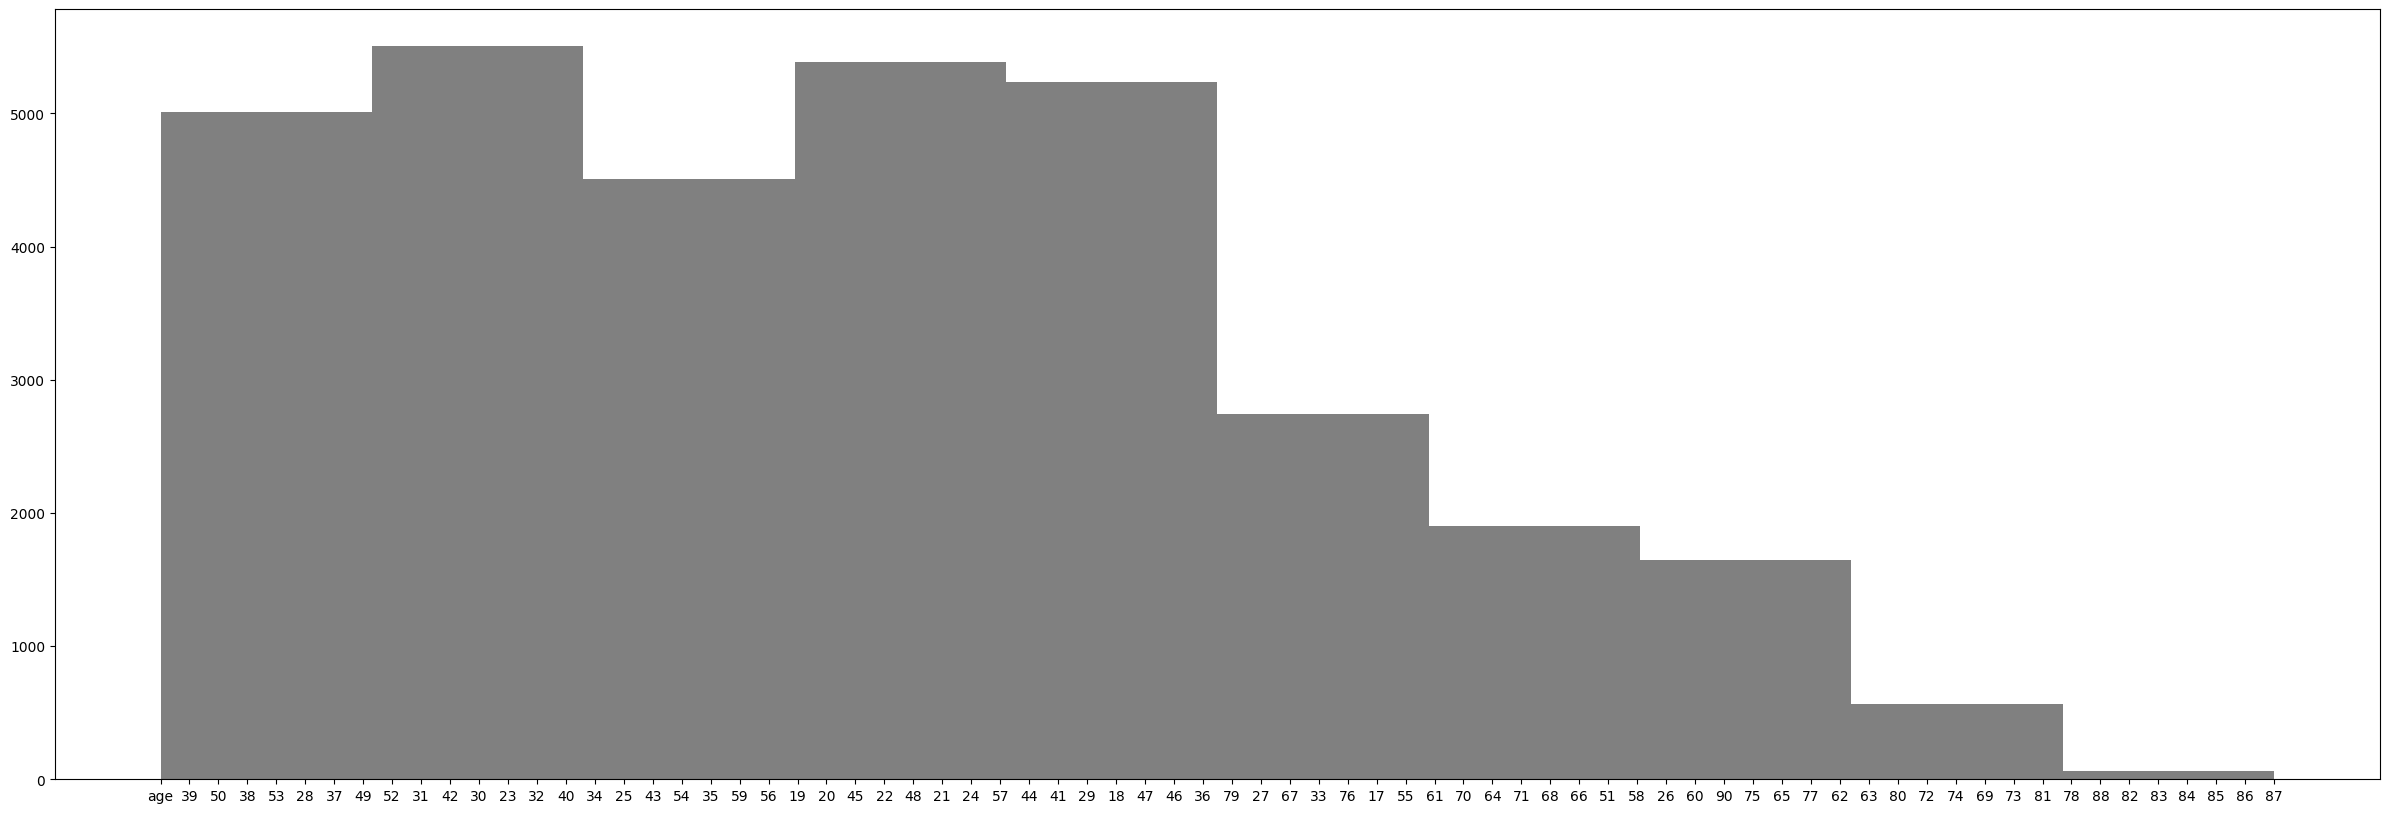

In [13]:
draw_distribution(column=df['age'], title="Age")
print(df[df['income']=='>50K']['age'].median(), 'years')
print(df[df['income']=='<=50K']['age'].median(), 'years')

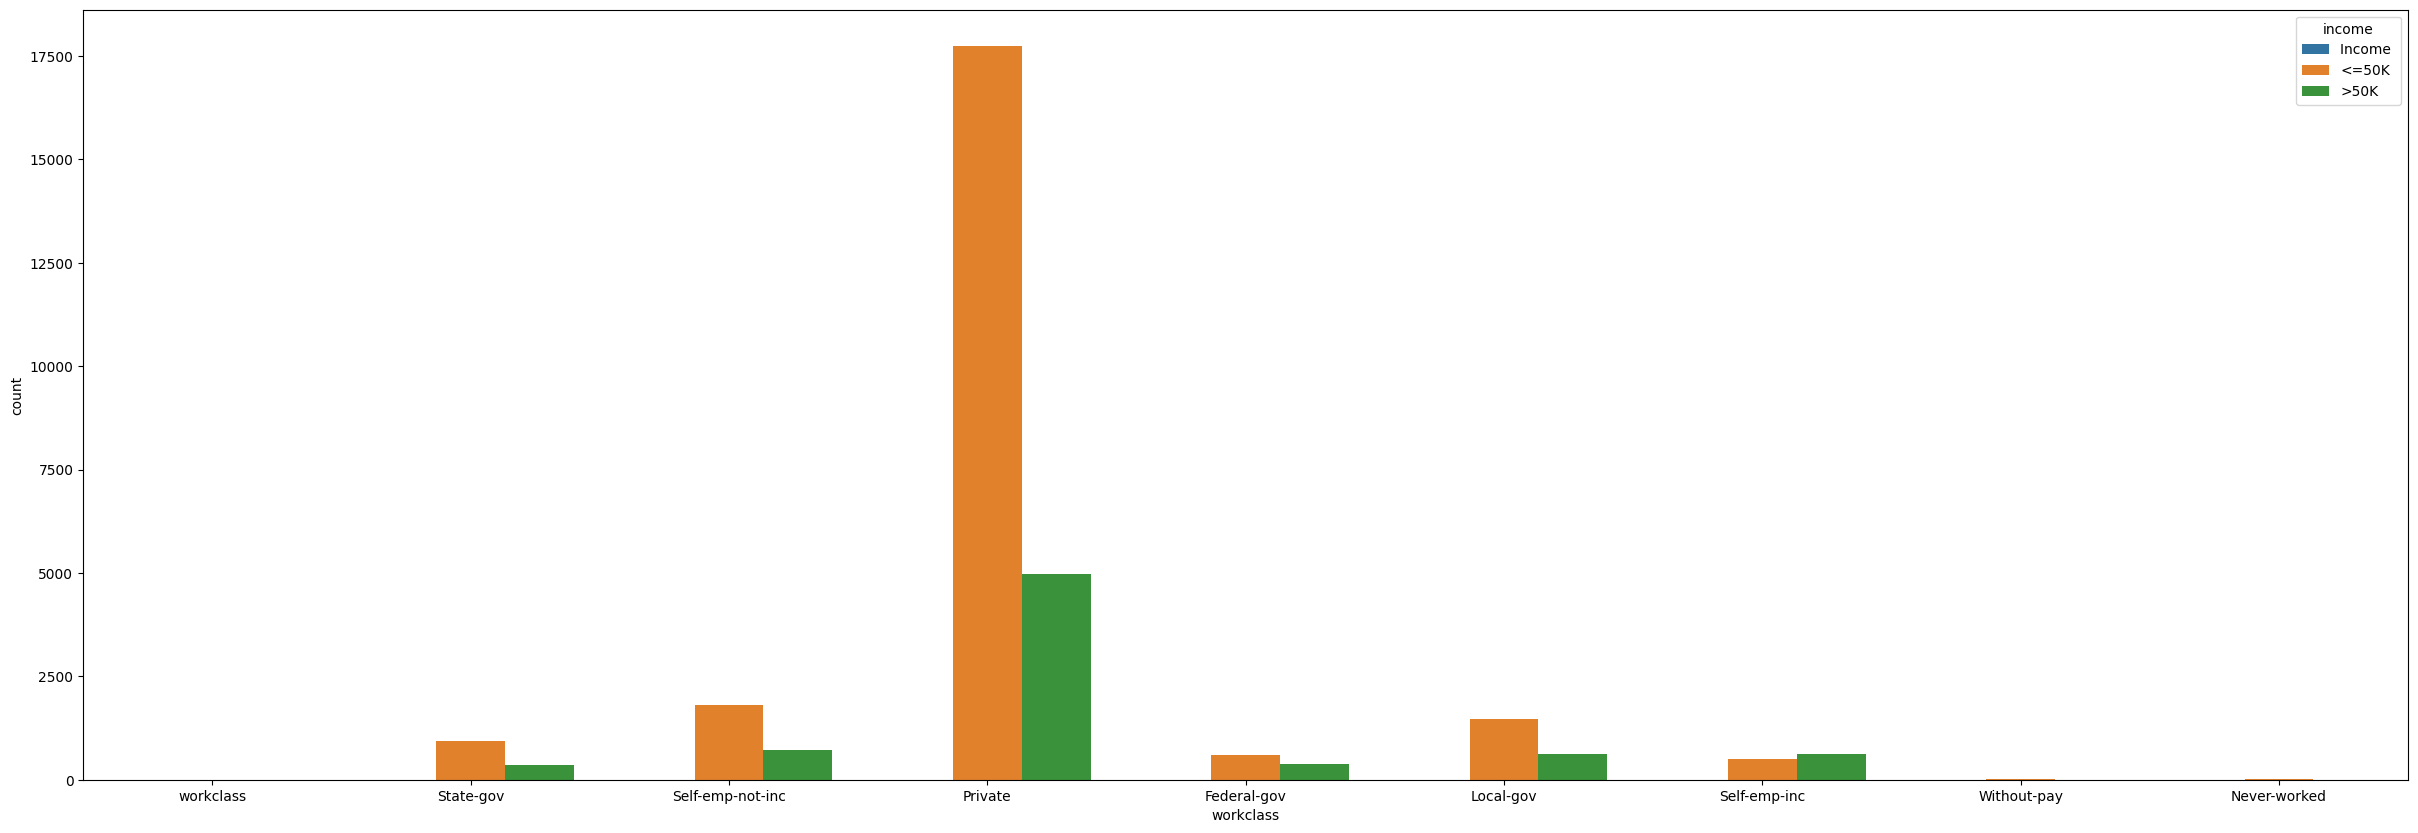

In [14]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.countplot(x = df["workclass"], hue=df["income"], ax = ax )
plt.show()

In [15]:
df['workclass'].replace(['Never-worked', 'Without-pay', 'Federal-gov'],'Other', inplace = True)
df['workclass'].fillna('Other', inplace = True)
df['workclass'].value_counts()

C:\Users\sondo\AppData\Local\Temp\ipykernel_15164\3976896924.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].replace(['Never-worked', 'Without-pay', 'Federal-gov'],'Other', inplace = True)


workclass
Private             22696
Other                2817
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
workclass               1
Name: count, dtype: int64

<Axes: xlabel='education', ylabel='count'>

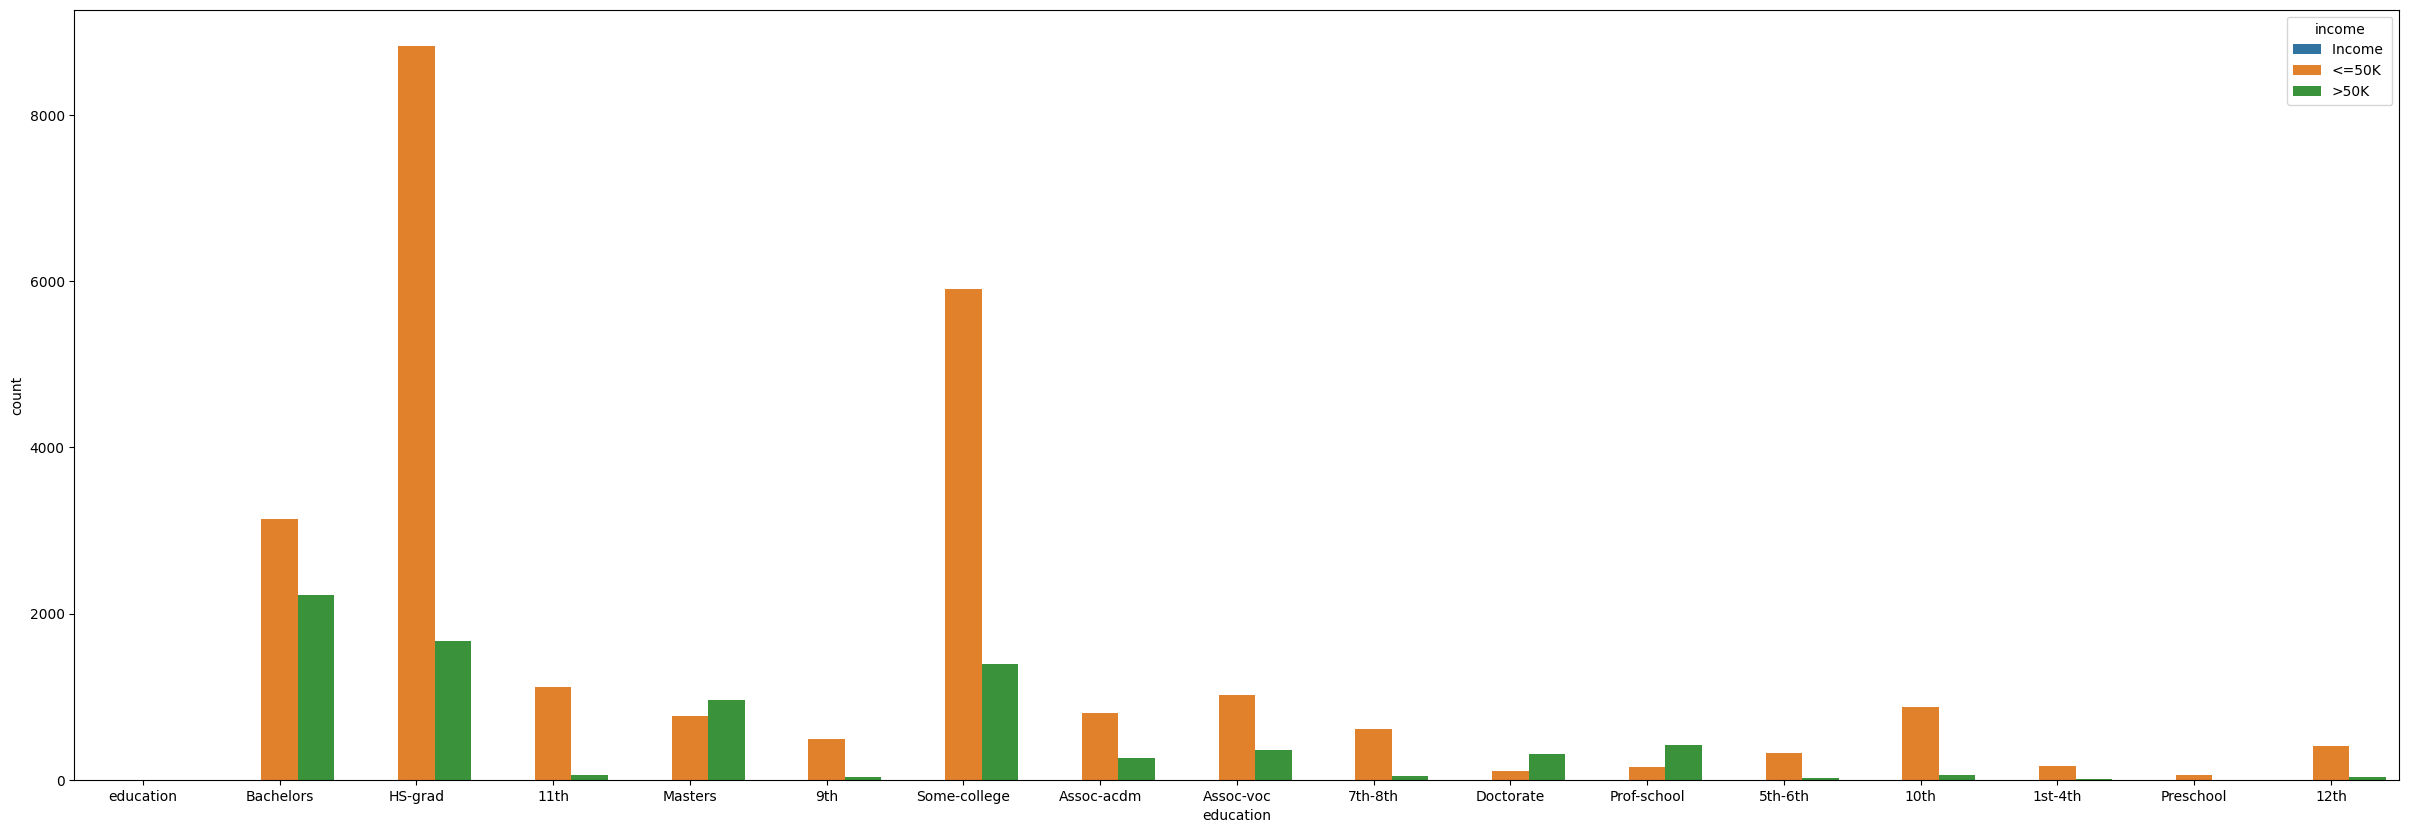

In [16]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.countplot(x = df["education"], hue=df["income"], ax =ax )

<Axes: xlabel='education-num', ylabel='count'>

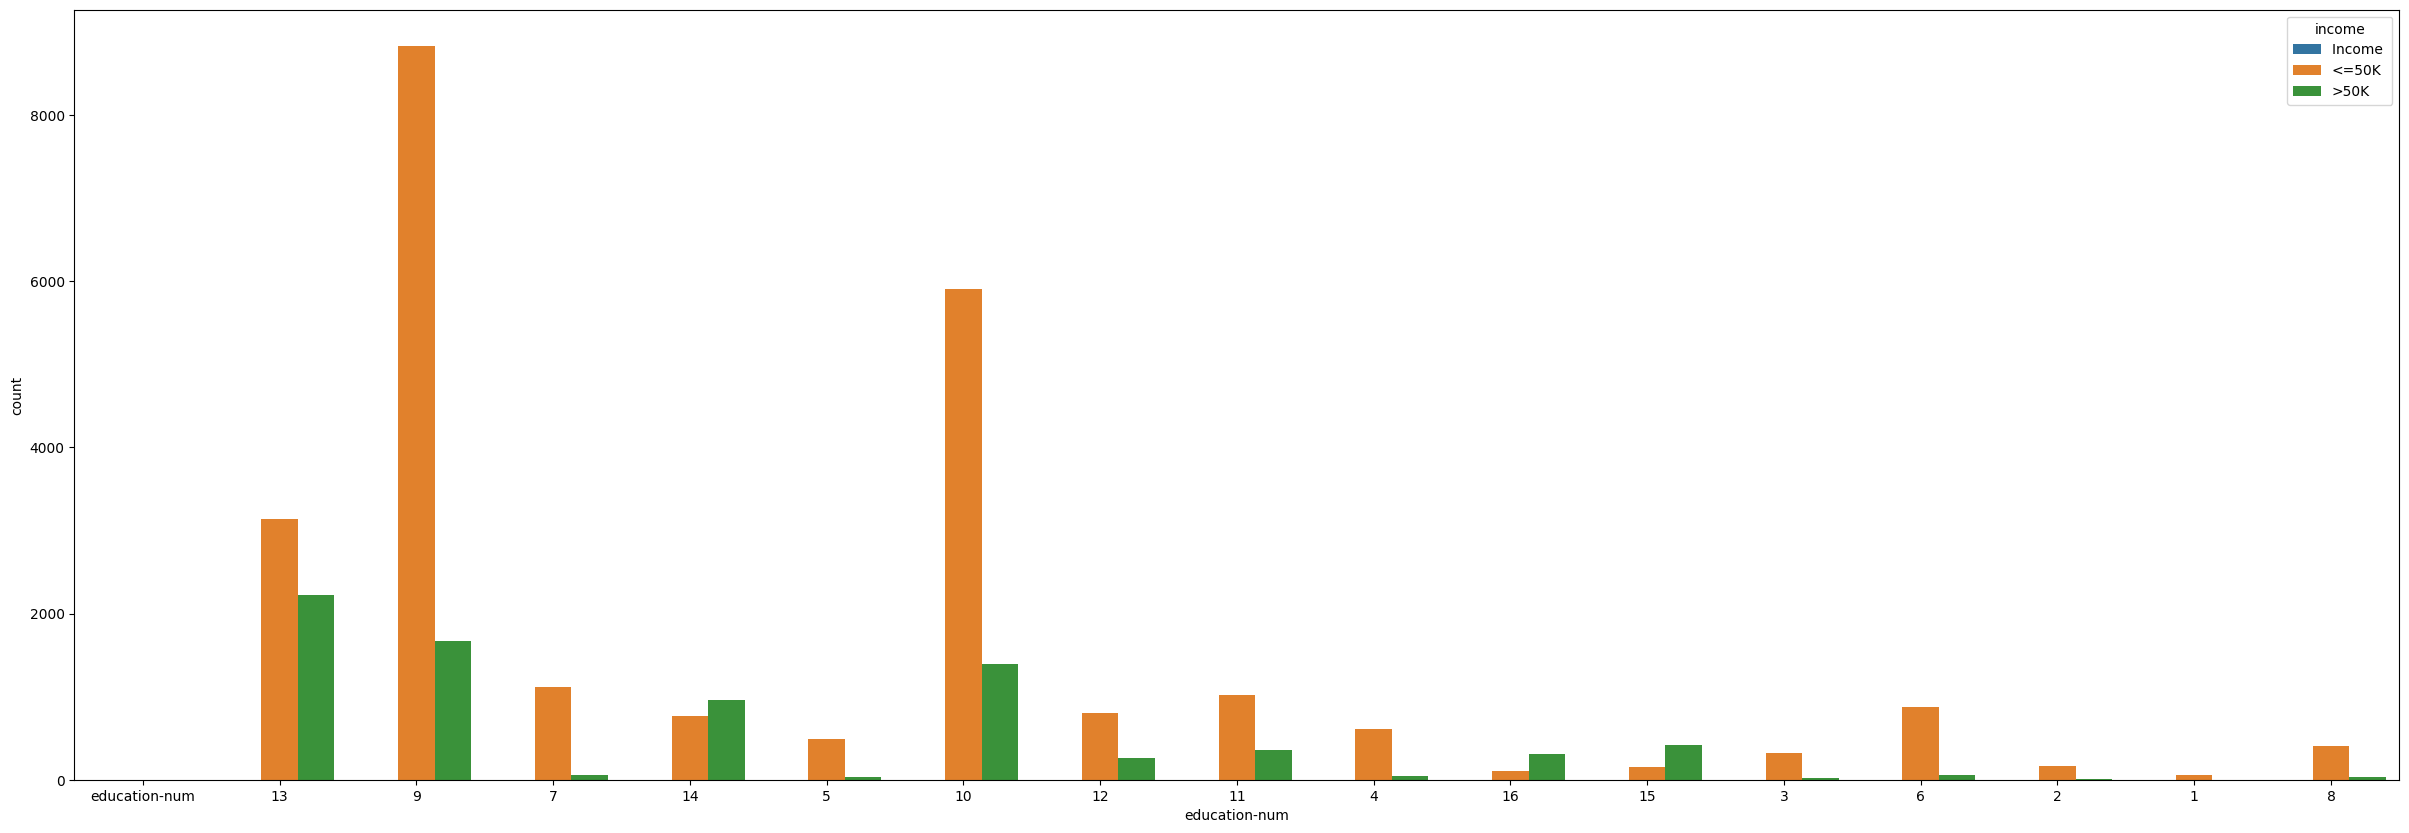

In [17]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.countplot(x = df["education-num"], hue=df["income"], ax =ax )

In [18]:
for i in df["education"].unique():
   	print("Equavilent Education Number for {} is {}".format(i, df[df['education'] == i]['education-num'].unique()))

Equavilent Education Number for education is ['education-num']
Equavilent Education Number for Bachelors is ['13']
Equavilent Education Number for HS-grad is ['9']
Equavilent Education Number for 11th is ['7']
Equavilent Education Number for Masters is ['14']
Equavilent Education Number for 9th is ['5']
Equavilent Education Number for Some-college is ['10']
Equavilent Education Number for Assoc-acdm is ['12']
Equavilent Education Number for Assoc-voc is ['11']
Equavilent Education Number for 7th-8th is ['4']
Equavilent Education Number for Doctorate is ['16']
Equavilent Education Number for Prof-school is ['15']
Equavilent Education Number for 5th-6th is ['3']
Equavilent Education Number for 10th is ['6']
Equavilent Education Number for 1st-4th is ['2']
Equavilent Education Number for Preschool is ['1']
Equavilent Education Number for 12th is ['8']


In [19]:
## handle with second col with null values

In [20]:
df['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
occupation              1
Name: count, dtype: int64

C:\Users\sondo\AppData\Local\Temp\ipykernel_15164\1546436814.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['occupation'].replace(['Armed-Forces'],'Other', inplace = True)


<Axes: xlabel='occupation', ylabel='count'>

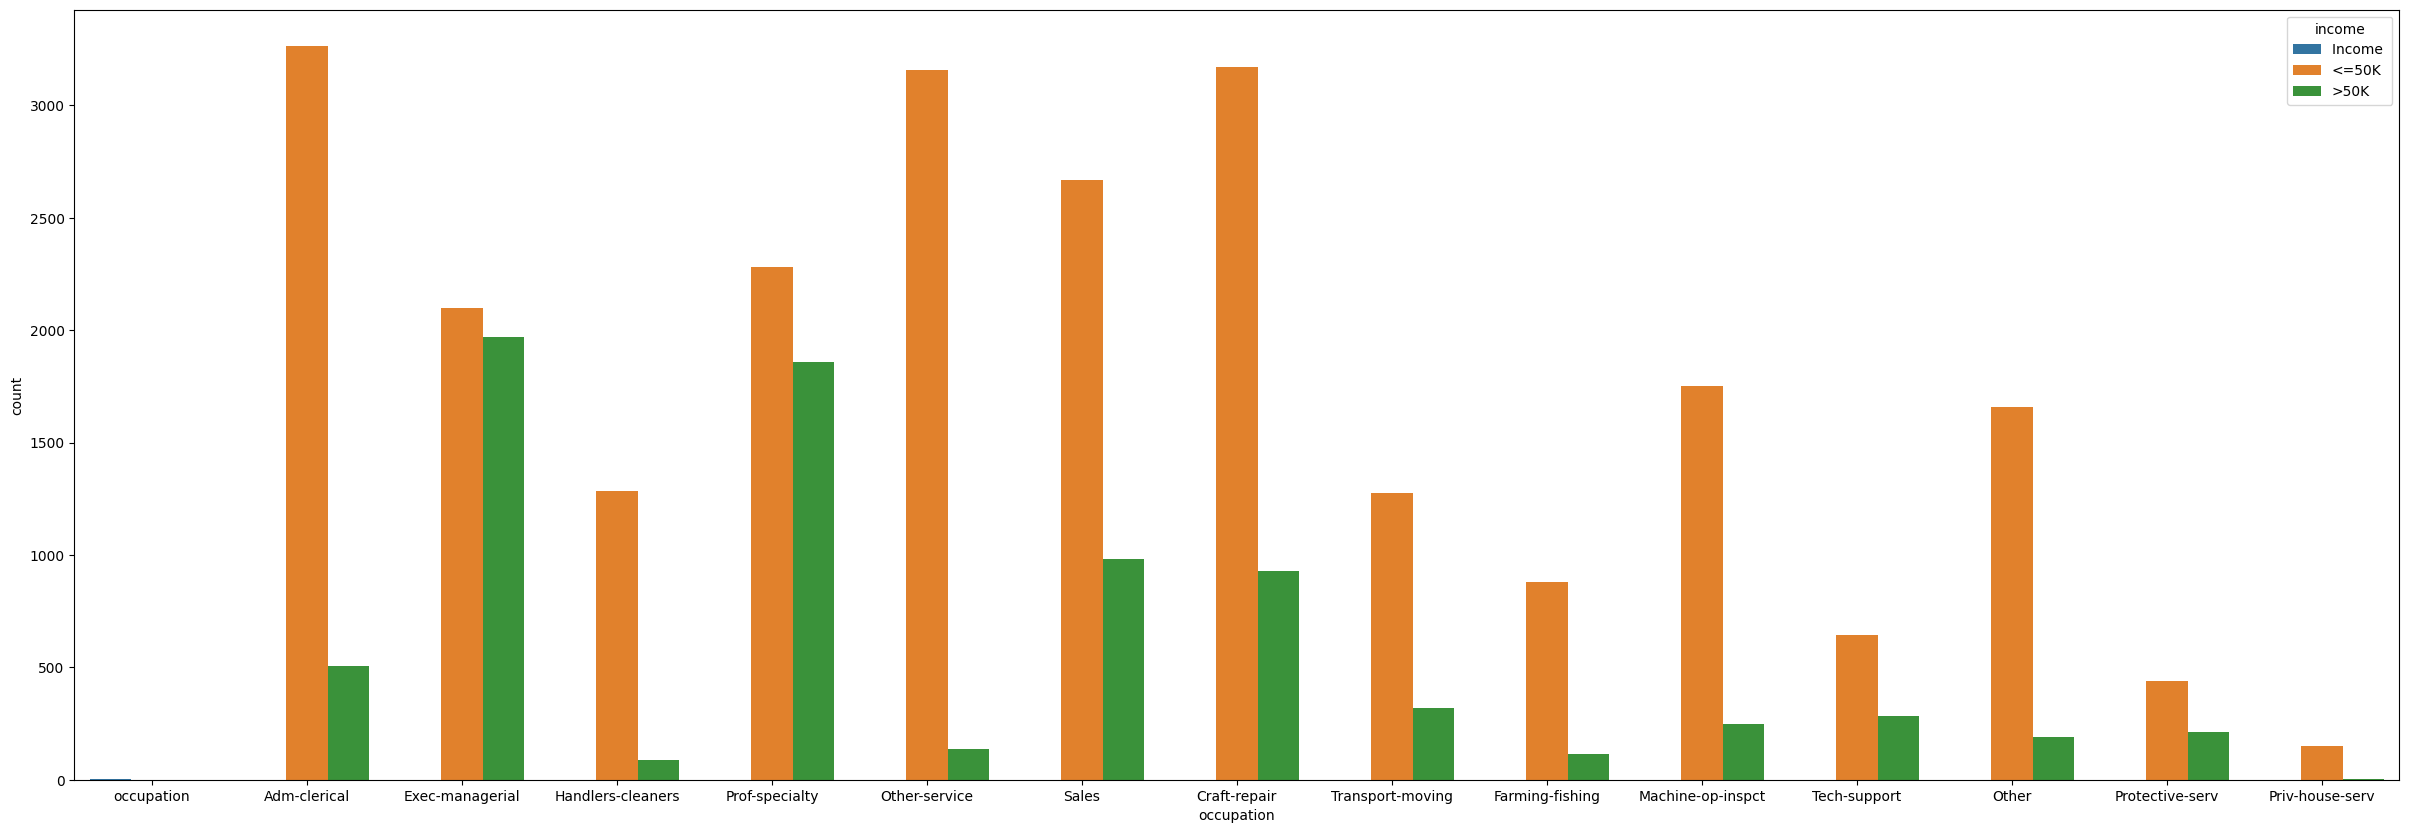

In [21]:
fig, ax = plt.subplots(figsize=(30, 10))
df['occupation'].replace(['Armed-Forces'],'Other', inplace = True)
df['occupation'].fillna('Other', inplace = True)
sns.countplot(x = df['occupation'], hue=df['income'], ax=ax)

In [22]:
df['race'].value_counts()

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
race                      1
Name: count, dtype: int64

C:\Users\sondo\AppData\Local\Temp\ipykernel_15164\3987742974.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['race'].replace(['Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],'Other', inplace = True)


<Axes: xlabel='race', ylabel='count'>

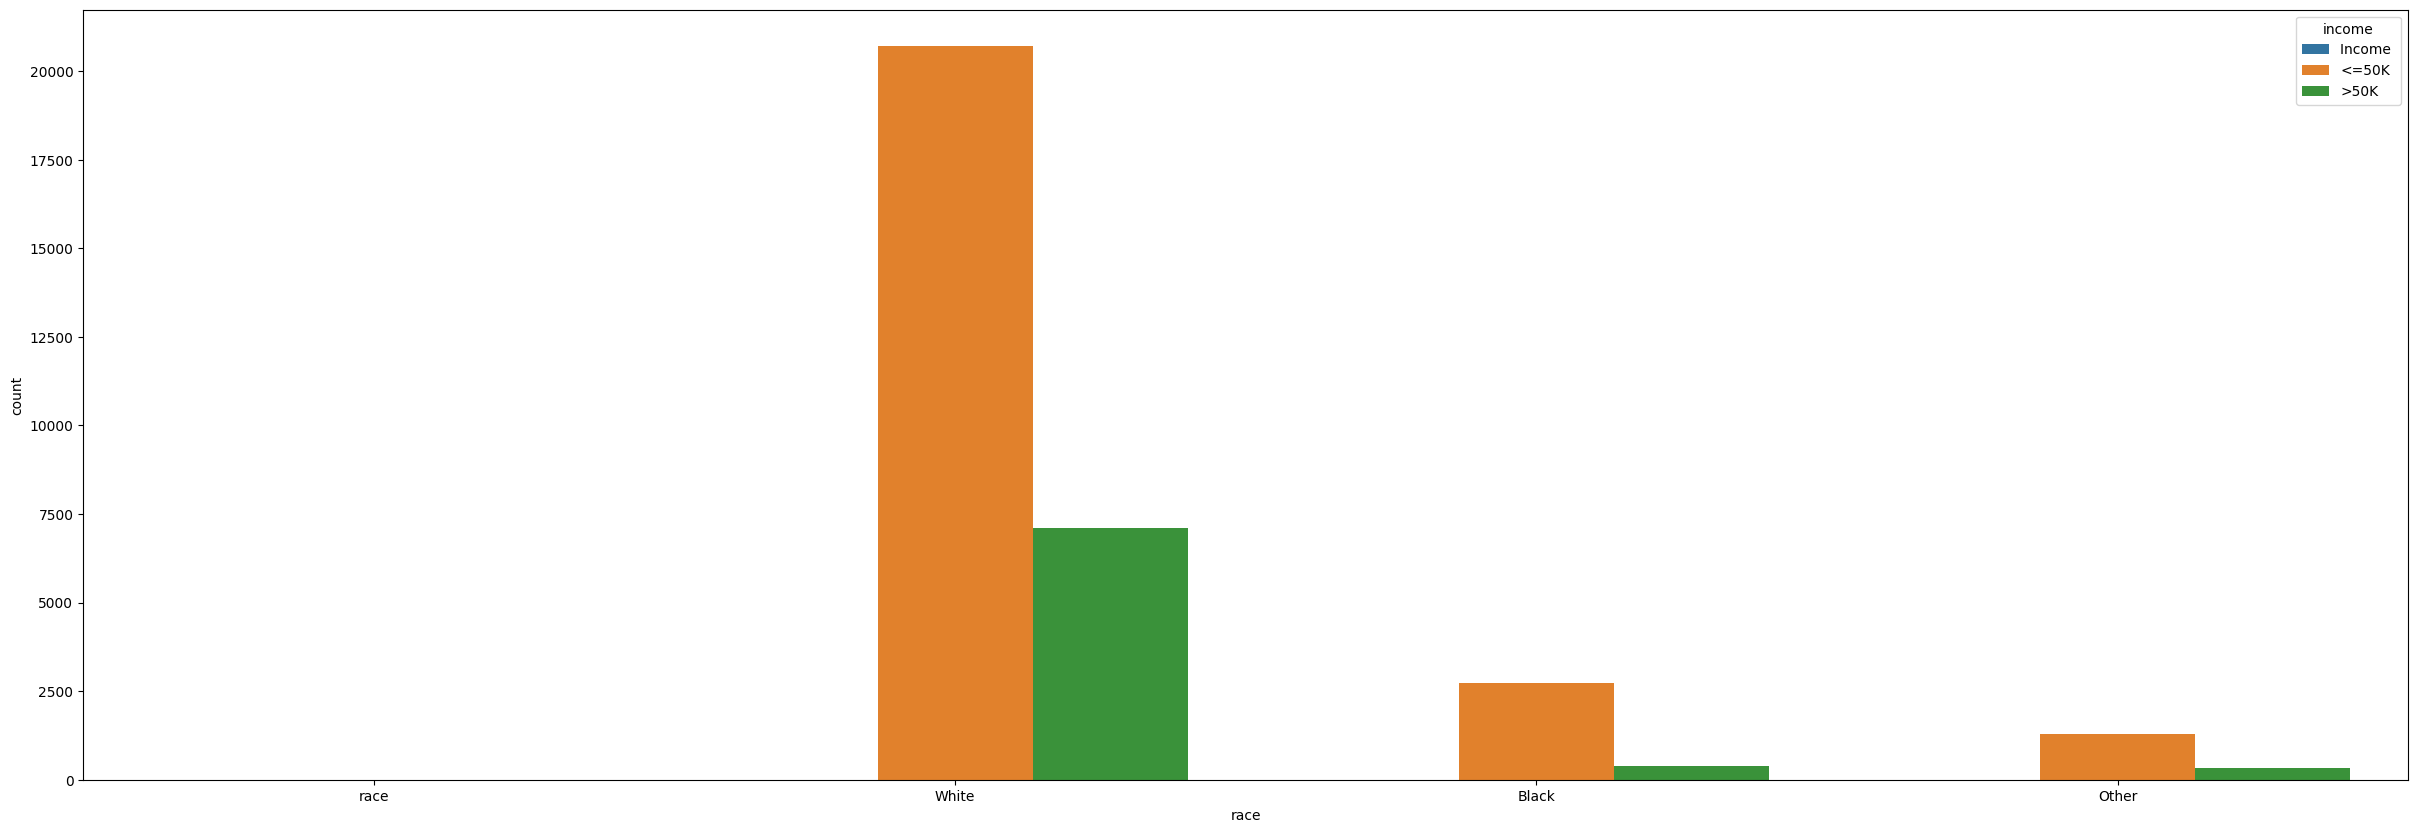

In [23]:
fig, ax = plt.subplots(figsize=(30, 10))
df['race'].replace(['Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],'Other', inplace = True)
sns.countplot(x = df['race'], hue=df['income'])

In [24]:
print(df['native-country'].value_counts())

native-country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France       

C:\Users\sondo\AppData\Local\Temp\ipykernel_15164\2832393406.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['native-country'].replace(countries,'Other', inplace = True)


<Axes: xlabel='native-country', ylabel='count'>

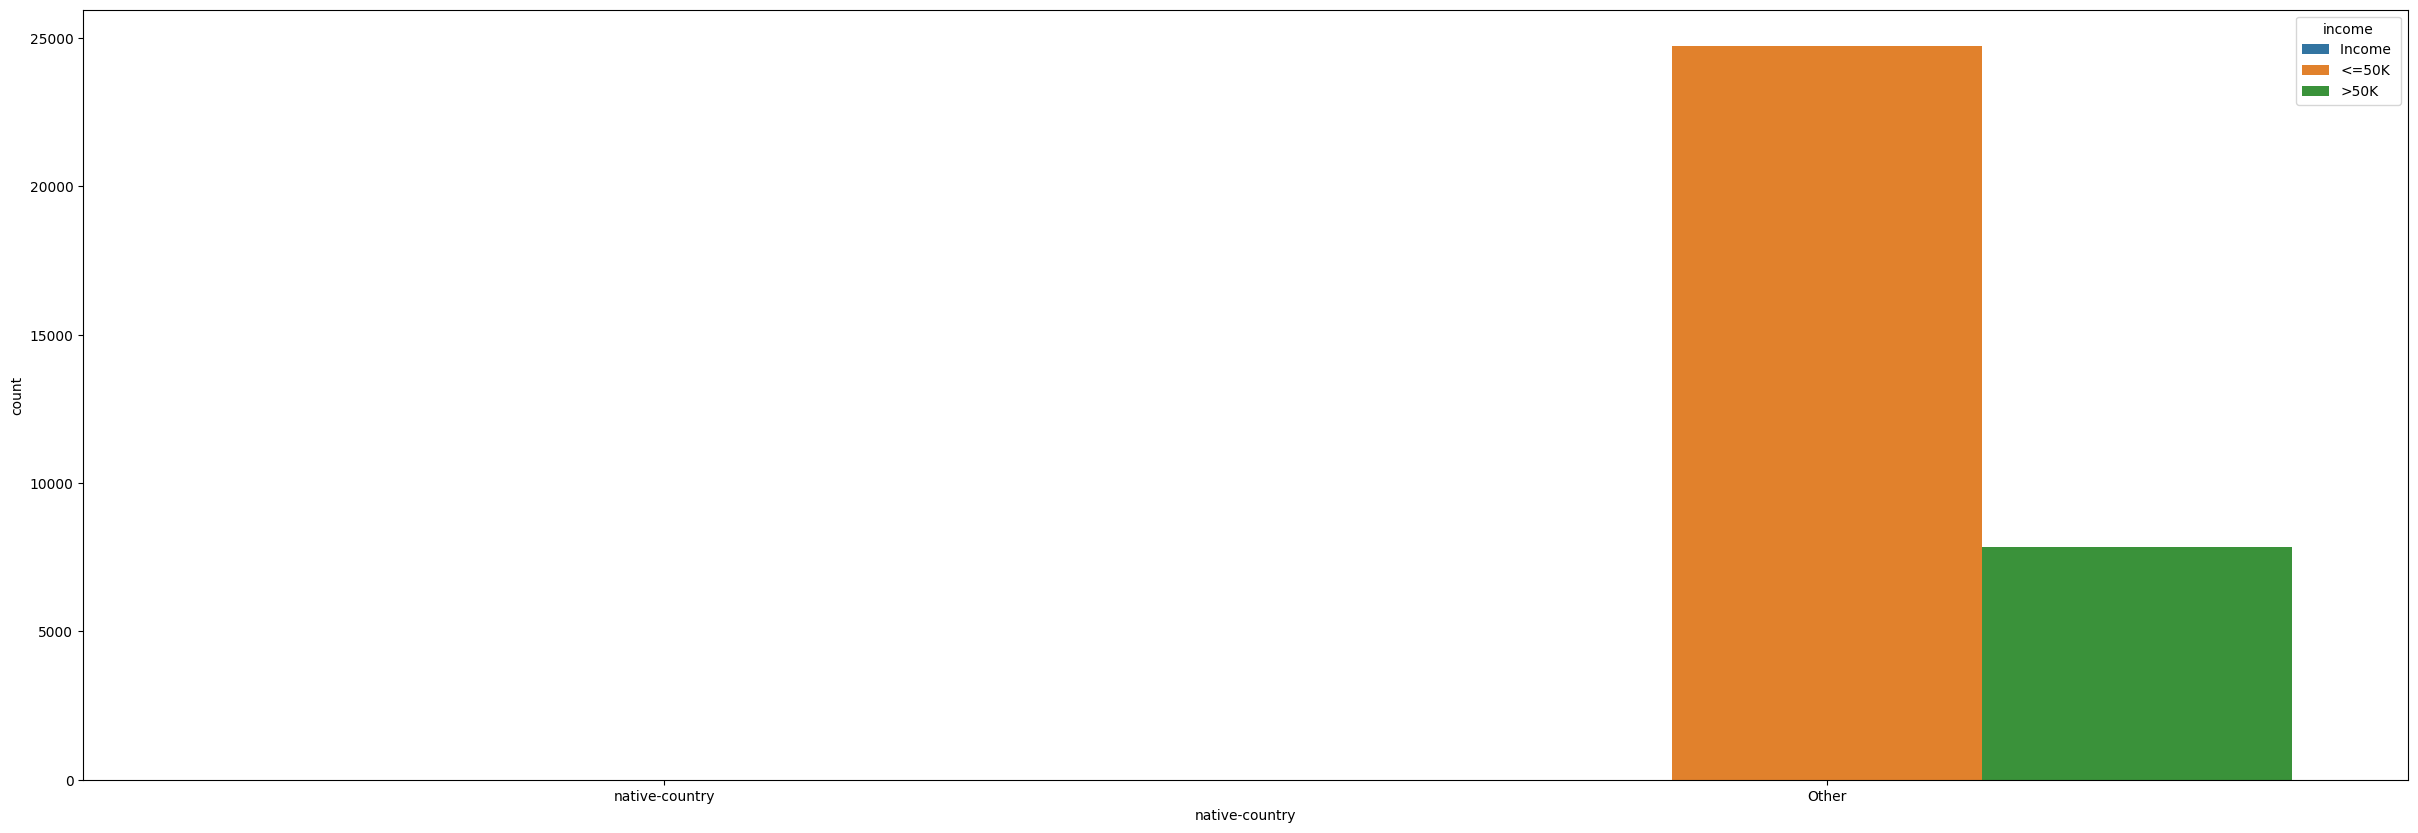

In [25]:
fig, ax = plt.subplots(figsize=(30, 10))
countries = np.array(df['native-country'].unique())
countries = np.delete(countries, 0)
df['native-country'].replace(countries,'Other', inplace = True)
df['native-country'].fillna('Other', inplace = True)
sns.countplot(x = df['native-country'], hue=df['income'], ax=ax)

In [26]:
df.drop(['education'], axis = 1, inplace = True)

Convert to num data to all catories

In [27]:
df['income'] = np.where(df['income'].isin(['>50K']), 1, 0)
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,0
1,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,Other,0
2,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,Other,0
3,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,Other,0
4,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,Other,0


### Apply encoder

In [28]:
target = 'income'
num_features = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'education-num']
cat_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [29]:
df = pd.get_dummies(df, columns=cat_features)
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Other,workclass_Private,...,relationship_relationship,race_Black,race_Other,race_White,race_race,sex_Female,sex_Male,sex_sex,native-country_Other,native-country_native-country
0,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,0,False,False,False,...,True,False,False,False,True,False,False,True,False,True
1,39,77516,13,2174,0,40,0,False,False,False,...,False,False,False,True,False,False,True,False,True,False
2,50,83311,13,0,0,13,0,False,False,False,...,False,False,False,True,False,False,True,False,True,False
3,38,215646,9,0,0,40,0,False,False,True,...,False,False,False,True,False,False,True,False,True,False
4,53,234721,7,0,0,40,0,False,False,True,...,False,True,False,False,False,False,True,False,True,False


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32562 entries, 0 to 32561
Data columns (total 53 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   age                                   32562 non-null  object
 1   fnlwgt                                32562 non-null  object
 2   education-num                         32562 non-null  object
 3   capital-gain                          32562 non-null  object
 4   capital-loss                          32562 non-null  object
 5   hours-per-week                        32562 non-null  object
 6   income                                32562 non-null  int32 
 7   workclass_Local-gov                   32562 non-null  bool  
 8   workclass_Other                       32562 non-null  bool  
 9   workclass_Private                     32562 non-null  bool  
 10  workclass_Self-emp-inc                32562 non-null  bool  
 11  workclass_Self-emp-not-inc  

In [31]:
features = df.columns.tolist()

features.remove(target)
x = df[features]
y = df[target]


# Select features.

In [32]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32562 entries, 0 to 32561
Data columns (total 52 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   age                                   32562 non-null  object
 1   fnlwgt                                32562 non-null  object
 2   education-num                         32562 non-null  object
 3   capital-gain                          32562 non-null  object
 4   capital-loss                          32562 non-null  object
 5   hours-per-week                        32562 non-null  object
 6   workclass_Local-gov                   32562 non-null  bool  
 7   workclass_Other                       32562 non-null  bool  
 8   workclass_Private                     32562 non-null  bool  
 9   workclass_Self-emp-inc                32562 non-null  bool  
 10  workclass_Self-emp-not-inc            32562 non-null  bool  
 11  workclass_State-gov         

# Logistic.

In [33]:
LR = LogisticRegression(penalty="l2", tol=0.01).fit(x,y)

ValueError: could not convert string to float: 'age'

# DecisionTree.

In [ ]:
DT = DecisionTreeClassifier(max_depth=25, max_features=10).fit(x, y)

# RandomForest.

In [ ]:
RF = RandomForestClassifier(max_depth=20, n_estimators=155).fit(x, y)

# SVM.

In [ ]:
SVM = SVC(kernel="rbf", tol=0.01).fit(x, y)

# KNN.

In [ ]:
KNN = KNeighborsClassifier(n_jobs=1, n_neighbors=4).fit(x,y)

# Read test data.

In [ ]:
dft = pd.read_csv("data/test_data.csv")
dft['workclass'].replace(['Never-worked', 'Without-pay', 'Federal-gov'],'Other', inplace = True)
dft['workclass'].fillna('Other', inplace = True)
dft['native-country'].replace(countries,'Other', inplace = True)
dft['occupation'].replace(['Armed-Forces'],'Other', inplace = True)
dft['race'].replace(['Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],'Other', inplace = True)
dft.drop(['education'], axis = 1, inplace = True)
dft["Income "] = np.where(dft["Income "].isin(['>50K.']), 1, 0)

dft["Income "].unique()

array([0, 1])

# Get info about test data.

In [ ]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education-num   16281 non-null  int64 
 4   marital-status  16281 non-null  object
 5   occupation      15315 non-null  object
 6   relationship    16281 non-null  object
 7   race            16281 non-null  object
 8   sex             16281 non-null  object
 9   capital-gain    16281 non-null  int64 
 10  capital-loss    16281 non-null  int64 
 11  hours-per-week  16281 non-null  int64 
 12  native-country  16281 non-null  object
 13  Income          16281 non-null  int32 
dtypes: int32(1), int64(6), object(7)
memory usage: 1.7+ MB



# Test data encoding

In [ ]:
dft = pd.get_dummies(dft, columns=cat_features)
dft.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income,workclass_Local-gov,workclass_Other,workclass_Private,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Other,native-country_United-States
0,25,226802,7,0,0,40,0,0,0,1,...,1,0,0,1,0,0,0,1,0,1
1,38,89814,9,0,0,50,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
2,28,336951,12,0,0,40,1,1,0,0,...,0,0,0,0,0,1,0,1,0,1
3,44,160323,10,7688,0,40,1,0,0,1,...,0,0,0,1,0,0,0,1,0,1
4,18,103497,10,0,0,30,0,0,1,0,...,1,0,0,0,0,1,1,0,0,1


In [ ]:
features = dft.columns.tolist()
features.remove("Income ")

X = dft[features]
Y = dft["Income "]


# Test data cleaning.

In [ ]:
x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 46 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   32561 non-null  int64
 1   fnlwgt                                32561 non-null  int64
 2   education-num                         32561 non-null  int64
 3   capital-gain                          32561 non-null  int64
 4   capital-loss                          32561 non-null  int64
 5   hours-per-week                        32561 non-null  int64
 6   workclass_Local-gov                   32561 non-null  uint8
 7   workclass_Other                       32561 non-null  uint8
 8   workclass_Private                     32561 non-null  uint8
 9   workclass_Self-emp-inc                32561 non-null  uint8
 10  workclass_Self-emp-not-inc            32561 non-null  uint8
 11  workclass_State-gov                   325

In [ ]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 46 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   16281 non-null  int64
 1   fnlwgt                                16281 non-null  int64
 2   education-num                         16281 non-null  int64
 3   capital-gain                          16281 non-null  int64
 4   capital-loss                          16281 non-null  int64
 5   hours-per-week                        16281 non-null  int64
 6   workclass_Local-gov                   16281 non-null  uint8
 7   workclass_Other                       16281 non-null  uint8
 8   workclass_Private                     16281 non-null  uint8
 9   workclass_Self-emp-inc                16281 non-null  uint8
 10  workclass_Self-emp-not-inc            16281 non-null  uint8
 11  workclass_State-gov                   162

# Get prediction.

In [ ]:
y_predLR = LR.predict(X)
y_predDT = DT.predict(X)
y_predRF = RF.predict(X)
y_predSVM = SVM.predict(X)
y_predKNN = KNN.predict(X)

# Accuracy_score.

In [ ]:
accLR = classification_report(Y,y_predLR)
accDT = classification_report(Y,y_predDT)
accRF = classification_report(Y,y_predRF)
accSVM = classification_report(Y,y_predSVM)
accKNN = classification_report(Y,y_predKNN)

In [ ]:
print("classification_report for LR \n",accLR,'\n',"classification_report for DT \n",accDT,'\n',"classification_report for RF \n",accRF,'\n',"classification_report for SVM \n",accSVM,'\n',"classification_report for KNN \n",accKNN)

classification_report for LR 
               precision    recall  f1-score   support

           0       0.81      0.96      0.88     12435
           1       0.69      0.26      0.38      3846

    accuracy                           0.80     16281
   macro avg       0.75      0.61      0.63     16281
weighted avg       0.78      0.80      0.76     16281
 
 classification_report for DT 
               precision    recall  f1-score   support

           0       0.88      0.89      0.88     12435
           1       0.62      0.59      0.60      3846

    accuracy                           0.82     16281
   macro avg       0.75      0.74      0.74     16281
weighted avg       0.81      0.82      0.82     16281
 
 classification_report for RF 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92     12435
           1       0.78      0.60      0.68      3846

    accuracy                           0.87     16281
   macro avg       0.83      0.

# All models accuracy_score.

In [ ]:
allacc = pd.DataFrame(columns=["Accuracy"], index=["KNN", "Random Forest",
                                                  "Decision Tree", "Logistic Regression","SVM"])
models = {'KNN' : KNN, 'Random Forest' : RF, 'Decision Tree' : DT, "Logistic Regression" : LR,"SVM":SVM}

for name, model in models.items() :
  allacc.loc[name, 'Accuracy'] = accuracy_score(Y, y_pred = model.predict(X))

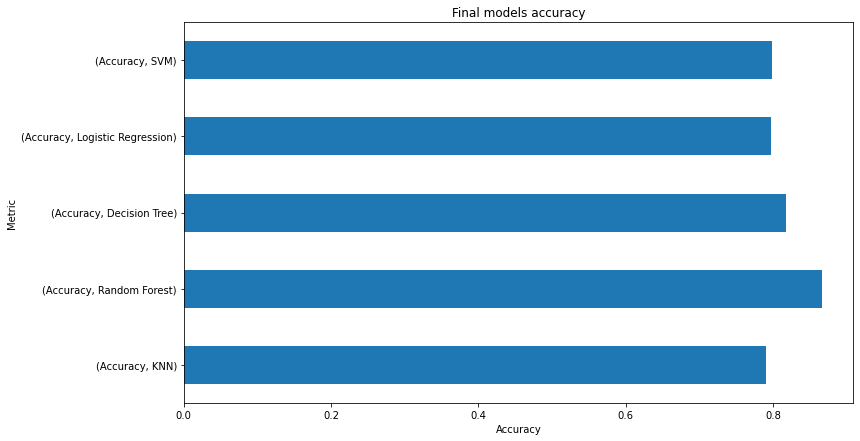

In [ ]:
allacc.unstack().plot(kind='barh', stacked=True, figsize=(12,7), title='Final models accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Metric')
plt.show()

# confusion_matrix.

In [ ]:
conLR = confusion_matrix(Y,y_predLR)
conDT = confusion_matrix(Y,y_predDT)
conRF = confusion_matrix(Y,y_predRF)
conSVM = confusion_matrix(Y,y_predSVM)
conKNN = confusion_matrix(Y,y_predKNN)

In [ ]:
print("confusion_matrix for LR \n",conLR,'\n',"confusion_matrix for DT \n",conDT,'\n',"confusion_matrix for RF \n",conRF,'\n',"confusion_matrix for SVM \n",conSVM,'\n',"confusion_matrix for KNN \n",conKNN)

confusion_matrix for LR 
 [[11989   446]
 [ 2846  1000]] 
 confusion_matrix for DT 
 [[11023  1412]
 [ 1566  2280]] 
 confusion_matrix for RF 
 [[11776   659]
 [ 1524  2322]] 
 confusion_matrix for SVM 
 [[12415    20]
 [ 3257   589]] 
 confusion_matrix for KNN 
 [[11838   597]
 [ 2813  1033]]


# Export models

In [ ]:
with open('Logistic', 'wb') as files:
    pickle.dump(LR, files)
with open('DT', 'wb') as files:
    pickle.dump(DT, files)
with open('RF', 'wb') as files:
    pickle.dump(RF, files)
with open('SVM', 'wb') as files:
    pickle.dump(SVM, files)
with open('KNN', 'wb') as files:
    pickle.dump(KNN, files)

load models

In [ ]:
with open("./DT", "rb") as fp:
    tree = pickle.load(fp)
    
with open("./RF", "rb") as fp:
    rand_forest = pickle.load(fp)
    
with open("./Logistic", "rb") as fp:
    log_reg = pickle.load(fp)
    
with open("./KNN", "rb") as fp:
    knn = pickle.load(fp)
    
with open("./SVM", "rb") as fp:
    svm = pickle.load(fp)